In [1]:
 #once locally, everytime on Noteable
!pip install pylandstats  #remove # to run command

  Using cached pylandstats-2.4.2-py2.py3-none-any.whl (51 kB)
  Using cached transonic-0.6.4-py3-none-any.whl (74 kB)
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using cached beniget-0.4.1-py3-none-any.whl (9.4 kB)


In [2]:
#handle warnings
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

import rasterio as rio
from rasterio.plot import show

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import BoundaryNorm

import pandas as pd
import geopandas as gpd
import numpy as np

from rasterstats import zonal_stats  #for zonal analysis
import pylandstats as pls      #for landscape metrics
from sklearn import metrics    #for confusion matrix
from libpysal import weights
from pysal.explore import esda
import numpy as np

import seaborn as sb

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

import pandas as pd
import geopandas as gpd
from shapely.wkt import loads  
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap
from matplotlib.colors import BoundaryNorm

from libpysal import weights
from pysal.explore import esda
from splot import esda as esdaplot

WARNING  Module /opt/conda/lib/python3.9/site-packages/pylandstats/landscape.py has not been compiled for          
         Transonic-Pythran

In [3]:
loc_bdf = pd.read_csv('data/ukbmssitelocationdata2022.csv')


In [4]:
loc_bdf= loc_bdf.rename(columns={'Site_Number': 'SITE_CODE'})

In [5]:
siteindex_df = pd.read_csv('data/ukbmssiteindices2022.csv')

In [6]:
bdf = pd.merge(siteindex_df, loc_bdf, on='SITE_CODE')

In [7]:
from shapely.geometry import Point

In [8]:
geometry = [Point(xy) for xy in zip(bdf.Easting, bdf.Northing)]

In [9]:
gbdf = gpd.GeoDataFrame(bdf, crs="EPSG:27700", geometry=geometry)

In [10]:
species = gbdf['SPECIES'].unique()
print(species)

['Aglais io' 'Aglais urticae' 'Anthocharis cardamines'
 'Aphantopus hyperantus' 'Aricia agestis' 'Celastrina argiolus'
 'Coenonympha pamphilus' 'Colias croceus' 'Favonius quercus'
 'Gonepteryx rhamni' 'Lasiommata megera' 'Lycaena phlaeas'
 'Maniola jurtina' 'Melanargia galathea' 'Ochlodes sylvanus'
 'Pararge aegeria' 'Pieris brassicae' 'Pieris napi' 'Pieris rapae'
 'Polygonia c-album' 'Polyommatus icarus' 'Pyrgus malvae'
 'Pyronia tithonus' 'Satyrium pruni' 'Satyrium w-album'
 'Thymelicus lineola' 'Thymelicus lineola/sylvestris'
 'Thymelicus sylvestris' 'Vanessa atalanta' 'Vanessa cardui'
 'Argynnis paphia' 'Limenitis camilla' 'Callophrys rubi'
 'Hipparchia semele' 'Speyeria aglaja' 'Apatura iris' 'Leptidea sinapis'
 'Thecla betulae' 'Boloria euphrosyne' 'Boloria selene' 'Cupido minimus'
 'Erynnis tages' 'Fabriciana adippe' 'Plebejus argus' 'Hamearis lucina'
 'Hesperia comma' 'Polyommatus bellargus' 'Polyommatus coridon'
 'Thymelicus acteon' 'Euphydryas aurinia' 'Papilio machaon'
 'Coe

In [11]:
type(species)
len(species)

60

In [12]:
GB = gpd.read_file('data/CTYUA_(Dec_2019)_Ultra_Generalised_Clipped_Boundaries_in_the_UK.geojson')
GB

OBJECTID  ctyua19cd             ctyua19nm      ctyua19nmw   bng_e  \
0           1  E06000001            Hartlepool                  447160   
1           2  E06000002         Middlesbrough                  451141   
2           3  E06000003  Redcar and Cleveland                  464361   
3           4  E06000004      Stockton-on-Tees                  444940   
4           5  E06000005            Darlington                  428029   
..        ...        ...                   ...             ...     ...   
211       212  W06000020               Torfaen         Torfaen  327459   
212       213  W06000021         Monmouthshire       Sir Fynwy  337812   
213       214  W06000022               Newport       Casnewydd  337897   
214       215  W06000023                 Powys           Powys  302329   
215       216  W06000024        Merthyr Tydfil  Merthyr Tudful  305916   

      bng_n     long        lat                                GlobalID  \
0    531474 -1.27018  54.676140  {70A72826-C9A1-4826-9B47-CCEBF29EEF07}   
1    516887 -1.21099  54.544670  {77377060-55E8-41E2-8FA0-F0E450F22B5A}   
2    519597 -1.00608  54.567520  {922557F5-4E33-4FC1-AFE6-98D2906DC9CE}   
3    518183 -1.30664  54.556911  {148A3F71-5D57-455E-8851-05C075F8B306}   
4    515648 -1.56835  54.535339  {87021DC3-C6DA-4CEC-BD9F-6EA5AC4FF744}   
..      ...      ...        ...                                     ...   
211  200480 -3.05101  51.698360  {02E734A4-3303-46B2-B28C-E6FEC482F4F1}   
212  209231 -2.90280  51.778271  {073CF85E-6834-4263-B18C-A616B09A6061}   
213  187432 -2.89769  51.582310  {A9BD44EF-163C-42CC-9A28-124B2C2212CC}   
214  273255 -3.43531  52.348640  {5964FBBE-8649-49CD-A453-03DDE36ED742}   
215  206424 -3.36425  51.748581  {F237351F-B06D-462F-863B-B8A36C8CCFA8}   

     SHAPE_Length  SHAPE_Area  \
0        0.654035    0.013493   
1        0.452613    0.007349   
2        1.118123    0.034547   
3        1.064817    0.028787   
4        1.129501    0.027620   
..            ...         ...   
211      0.798982    0.016353   
212      2.149708    0.111261   
213      1.085465    0.024910   
214      6.022215    0.685639   
215      0.652840    0.014768   

                                              geometry  
0    MULTIPOLYGON (((-1.24099 54.72319, -1.17617 54...  
1    MULTIPOLYGON (((-1.20090 54.57764, -1.19056 54...  
2    MULTIPOLYGON (((-1.19752 54.58211, -1.16019 54...  
3    MULTIPOLYGON (((-1.19752 54.58211, -1.20090 54...  
4    MULTIPOLYGON (((-1.69693 54.53601, -1.70527 54...  
..                                                 ...  
211  MULTIPOLYGON (((-3.13419 51.79281, -3.10824 51...  
212  MULTIPOLYGON (((-3.02594 51.95728, -3.00812 51...  
213  MULTIPOLYGON (((-2.82164 51.55407, -2.90488 51...  
214  MULTIPOLYGON (((-3.90625 52.56080, -3.92309 52...  
215  MULTIPOLYGON (((-3.44420 51.81649, -3.41713 51...  

[216 rows x 12 columns]

In [13]:
type(GB)

geopandas.geodataframe.GeoDataFrame

In [14]:
GB  = GB.to_crs({'init': 'epsg:27700'}) 


In [15]:
y2022 = gbdf.loc[(gbdf['YEAR']== 2022)]

## county richness


In [16]:
list(y2022)

['SITE_CODE',
 'COUNTRY',
 'SPECIES_CODE',
 'SPECIES',
 'COMMON_NAME',
 'YEAR',
 'SITE_INDEX',
 'Site_Name',
 'Gridreference',
 'Easting',
 'Northing',
 'Length',
 'Country',
 'N_sections',
 'N_yrs_surveyed',
 'First_year_surveyed',
 'Last_year_surveyed',
 'Survey_type',
 'geometry']

In [17]:
y2022_g = y2022.rename(columns = {"geometry" : "geometry_p"})
type(y2022_g)
y2022_g = y2022_g.set_geometry('geometry_p')

In [18]:
y2022_s = gpd.sjoin(y2022_g, GB) 
y2022_s


SITE_CODE  COUNTRY  SPECIES_CODE                 SPECIES  \
46              1  England            84               Aglais io   
93              1  England             2          Aglais urticae   
140             1  England             4  Anthocharis cardamines   
187             1  England             8   Aphantopus hyperantus   
234             1  England            20          Aricia agestis   
...           ...      ...           ...                     ...   
707371       5816  England            99             Pieris napi   
707372       5816  England           100            Pieris rapae   
707373       5816  England           104       Polygonia c-album   
707374       5816  England           106      Polyommatus icarus   
707375       5816  England            76        Pyronia tithonus   

                COMMON_NAME  YEAR  SITE_INDEX        Site_Name Gridreference  \
46                  Peacock  2022         100  Woodwalton Farm      TL214817   
93      Small Tortoiseshell  2022          76  Woodwalton Farm      TL214817   
140              Orange-tip  2022           7  Woodwalton Farm      TL214817   
187                 Ringlet  2022         324  Woodwalton Farm      TL214817   
234             Brown Argus  2022          11  Woodwalton Farm      TL214817   
...                     ...   ...         ...              ...           ...   
707371   Green-veined White  2022          -2          Canklow      SK428913   
707372          Small White  2022          -2          Canklow      SK428913   
707373                Comma  2022          -2          Canklow      SK428913   
707374          Common Blue  2022          -2          Canklow      SK428913   
707375           Gatekeeper  2022          -2          Canklow      SK428913   

        Easting  ...  ctyua19cd       ctyua19nm ctyua19nmw   bng_e   bng_n  \
46       521400  ...  E10000003  Cambridgeshire             520312  273864   
93       521400  ...  E10000003  Cambridgeshire             520312  273864   
140      521400  ...  E10000003  Cambridgeshire             520312  273864   
187      521400  ...  E10000003  Cambridgeshire             520312  273864   
234      521400  ...  E10000003  Cambridgeshire             520312  273864   
...         ...  ...        ...             ...        ...     ...     ...   
707371   442800  ...  E08000018       Rotherham             447542  388980   
707372   442800  ...  E08000018       Rotherham             447542  388980   
707373   442800  ...  E08000018       Rotherham             447542  388980   
707374   442800  ...  E08000018       Rotherham             447542  388980   
707375   442800  ...  E08000018       Rotherham             447542  388980   

           long        lat                                GlobalID  \
46     -0.23506  52.349659  {27A53AF2-2A3A-4A77-B8E7-6411A304FC2D}   
93     -0.23506  52.349659  {27A53AF2-2A3A-4A77-B8E7-6411A304FC2D}   
140    -0.23506  52.349659  {27A53AF2-2A3A-4A77-B8E7-6411A304FC2D}   
187    -0.23506  52.349659  {27A53AF2-2A3A-4A77-B8E7-6411A304FC2D}   
234    -0.23506  52.349659  {27A53AF2-2A3A-4A77-B8E7-6411A304FC2D}   
...         ...        ...                                     ...   
707371 -1.28651  53.395531  {2941865F-B9DB-4E7C-9378-DC430AF34CA2}   
707372 -1.28651  53.395531  {2941865F-B9DB-4E7C-9378-DC430AF34CA2}   
707373 -1.28651  53.395531  {2941865F-B9DB-4E7C-9378-DC430AF34CA2}   
707374 -1.28651  53.395531  {2941865F-B9DB-4E7C-9378-DC430AF34CA2}   
707375 -1.28651  53.395531  {2941865F-B9DB-4E7C-9378-DC430AF34CA2}   

       SHAPE_Length  SHAPE_Area  
46         4.366784    0.403046  
93         4.366784    0.403046  
140        4.366784    0.403046  
187        4.366784    0.403046  
234        4.366784    0.403046  
...             ...         ...  
707371     1.094118    0.039099  
707372     1.094118    0.039099  
707373     1.094118    0.039099  
707374     1.094118    0.039099  
707375     1.094118    0.039099  

[41875 rows x 31 columns]

In [19]:
list(y2022_s)

['SITE_CODE',
 'COUNTRY',
 'SPECIES_CODE',
 'SPECIES',
 'COMMON_NAME',
 'YEAR',
 'SITE_INDEX',
 'Site_Name',
 'Gridreference',
 'Easting',
 'Northing',
 'Length',
 'Country',
 'N_sections',
 'N_yrs_surveyed',
 'First_year_surveyed',
 'Last_year_surveyed',
 'Survey_type',
 'geometry_p',
 'index_right',
 'OBJECTID',
 'ctyua19cd',
 'ctyua19nm',
 'ctyua19nmw',
 'bng_e',
 'bng_n',
 'long',
 'lat',
 'GlobalID',
 'SHAPE_Length',
 'SHAPE_Area']

In [20]:
k = GB.loc[:, GB.columns.intersection(['ctyua19nm','geometry'])]
k

ctyua19nm                                           geometry
0              Hartlepool  MULTIPOLYGON (((448985.072 536730.823, 453193....
1           Middlesbrough  MULTIPOLYGON (((451751.773 520563.336, 452423....
2    Redcar and Cleveland  MULTIPOLYGON (((451964.717 521063.186, 454347....
3        Stockton-on-Tees  MULTIPOLYGON (((451964.717 521063.186, 451751....
4              Darlington  MULTIPOLYGON (((419708.676 515679.449, 419162....
..                    ...                                                ...
211               Torfaen  MULTIPOLYGON (((321874.022 211070.663, 323669....
212         Monmouthshire  MULTIPOLYGON (((329596.972 229252.536, 330775....
213               Newport  MULTIPOLYGON (((343130.983 184229.295, 337329....
214                 Powys  MULTIPOLYGON (((270876.243 297592.686, 269746....
215        Merthyr Tydfil  MULTIPOLYGON (((300546.087 214081.868, 302452....

[216 rows x 2 columns]

In [21]:
y2022_sj = pd.merge(k, y2022_s, on='ctyua19nm')

In [22]:
d = y2022_sj.groupby('ctyua19nm').nunique('SPECIES')
d

geometry  SITE_CODE  COUNTRY  SPECIES_CODE  SPECIES  \
ctyua19nm                                                                      
Aberdeen City                   1          4        1            15       15   
Aberdeenshire                   1          7        1            21       21   
Angus                           1          4        1            14       14   
Antrim and Newtownabbey         1          1        1            10       10   
Ards and North Down             1          4        1            14       14   
...                           ...        ...      ...           ...      ...   
Windsor and Maidenhead          1          3        1            31       31   
Wirral                          1          6        1            23       23   
Worcestershire                  1         40        1            42       42   
Wrexham                         1          3        1            33       33   
York                            1          4        1            27       27   

                         COMMON_NAME  YEAR  SITE_INDEX  Site_Name  \
ctyua19nm                                                           
Aberdeen City                     15     1          22          4   
Aberdeenshire                     21     1          21          7   
Angus                             14     1          17          4   
Antrim and Newtownabbey           10     1           1          1   
Ards and North Down               14     1          16          4   
...                              ...   ...         ...        ...   
Windsor and Maidenhead            31     1          30          3   
Wirral                            23     1          19          6   
Worcestershire                    42     1         153         40   
Wrexham                           33     1          19          3   
York                              27     1          26          4   

                         Gridreference  ...  OBJECTID  ctyua19cd  ctyua19nmw  \
ctyua19nm                               ...                                    
Aberdeen City                        4  ...         1          1           1   
Aberdeenshire                        7  ...         1          1           1   
Angus                                4  ...         1          1           1   
Antrim and Newtownabbey              1  ...         1          1           1   
Ards and North Down                  4  ...         1          1           1   
...                                ...  ...       ...        ...         ...   
Windsor and Maidenhead               3  ...         1          1           1   
Wirral                               6  ...         1          1           1   
Worcestershire                      40  ...         1          1           1   
Wrexham                              3  ...         1          1           1   
York                                 4  ...         1          1           1   

                         bng_e  bng_n  long  lat  GlobalID  SHAPE_Length  \
ctyua19nm                                                                  
Aberdeen City                1      1     1    1         1             1   
Aberdeenshire                1      1     1    1         1             1   
Angus                        1      1     1    1         1             1   
Antrim and Newtownabbey      1      1     1    1         1             1   
Ards and North Down          1      1     1    1         1             1   
...                        ...    ...   ...  ...       ...           ...   
Windsor and Maidenhead       1      1     1    1         1             1   
Wirral                       1      1     1    1         1             1   
Worcestershire               1      1     1    1         1             1   
Wrexham                      1      1     1    1         1             1   
York                         1      1     1    1         1             1   

                         SHAPE_Area  
ctyua19nm         

In [23]:
f = d.loc[:, d.columns.intersection(['ctyua19nm','SPECIES_CODE'])]
f


SPECIES_CODE
ctyua19nm                            
Aberdeen City                      15
Aberdeenshire                      21
Angus                              14
Antrim and Newtownabbey            10
Ards and North Down                14
...                               ...
Windsor and Maidenhead             31
Wirral                             23
Worcestershire                     42
Wrexham                            33
York                               27

[171 rows x 1 columns]

In [24]:
richness = f.rename(columns = {"SPECIES_CODE" : "RICHNESS"})

In [25]:
richness

RICHNESS
ctyua19nm                        
Aberdeen City                  15
Aberdeenshire                  21
Angus                          14
Antrim and Newtownabbey        10
Ards and North Down            14
...                           ...
Windsor and Maidenhead         31
Wirral                         23
Worcestershire                 42
Wrexham                        33
York                           27

[171 rows x 1 columns]

In [26]:
y2022


SITE_CODE  COUNTRY  SPECIES_CODE                 SPECIES  \
46              1  England            84               Aglais io   
93              1  England             2          Aglais urticae   
140             1  England             4  Anthocharis cardamines   
187             1  England             8   Aphantopus hyperantus   
234             1  England            20          Aricia agestis   
...           ...      ...           ...                     ...   
707758       6105  England           106      Polyommatus icarus   
707759       6105  England            76        Pyronia tithonus   
707760       6105  England            12         Speyeria aglaja   
707761       6105  England           122        Vanessa atalanta   
707762       6105  England           123          Vanessa cardui   

                  COMMON_NAME  YEAR  SITE_INDEX           Site_Name  \
46                    Peacock  2022         100     Woodwalton Farm   
93        Small Tortoiseshell  2022          76     Woodwalton Farm   
140                Orange-tip  2022           7     Woodwalton Farm   
187                   Ringlet  2022         324     Woodwalton Farm   
234               Brown Argus  2022          11     Woodwalton Farm   
...                       ...   ...         ...                 ...   
707758            Common Blue  2022         128  Township Allotment   
707759             Gatekeeper  2022           3  Township Allotment   
707760  Dark Green Fritillary  2022          -2  Township Allotment   
707761            Red Admiral  2022          -2  Township Allotment   
707762           Painted Lady  2022           1  Township Allotment   

       Gridreference  Easting  Northing  Length  Country  N_sections  \
46          TL214817   521400    281700  2038.0  England        12.0   
93          TL214817   521400    281700  2038.0  England        12.0   
140         TL214817   521400    281700  2038.0  England        12.0   
187         TL214817   521400    281700  2038.0  England        12.0   
234         TL214817   521400    281700  2038.0  England        12.0   
...              ...      ...       ...     ...      ...         ...   
707758      SD442888   344200    488800  4410.0  England        14.0   
707759      SD442888   344200    488800  4410.0  England        14.0   
707760      SD442888   344200    488800  4410.0  England        14.0   
707761      SD442888   344200    488800  4410.0  England        14.0   
707762      SD442888   344200    488800  4410.0  England        14.0   

        N_yrs_surveyed  First_year_surveyed  Last_year_surveyed Survey_type  \
46                  47                 1976                2022       UKBMS   
93                  47                 1976                2022       UKBMS   
140                 47                 1976                2022       UKBMS   
187                 47                 1976                2022       UKBMS   
234                 47                 1976                2022       UKBMS   
...                ...                  ...                 ...         ...   
707758               1                 2022                2022       UKBMS   
707759               1                 2022                2022       UKBMS   
707760               1                 2022                2022       UKBMS   
707761               1                 2022                2022       UKBMS   
707762               1                 2022                2022       UKBMS   

                             geometry  
46      POINT (521400.000 281700.000)  
93      POINT (521400.000 281700.000)  
140     POINT (521400.000 281700.000)  
187     POINT (521400.000 281700.000)  
234     POINT (521400.000 281700.000)  
...                               ...  
707758  POINT (344200.000 488800.000)  
707759  POINT (344200.000 488800.000)  
707760  POINT (344200.000 488800.000)  
707761  POINT (344200.000 488800.000)  
707762  POINT (344200.000 488800.000)  

[42796 rows x 19 columns]

In [27]:
y2022_r = pd.merge(richness, y2022_sj, on='ctyua19nm')
y2022_r

ctyua19nm  RICHNESS  \
0      Aberdeen City        15   
1      Aberdeen City        15   
2      Aberdeen City        15   
3      Aberdeen City        15   
4      Aberdeen City        15   
...              ...       ...   
41870           York        27   
41871           York        27   
41872           York        27   
41873           York        27   
41874           York        27   

                                                geometry  SITE_CODE   COUNTRY  \
0      MULTIPOLYGON (((394932.327 799431.079, 392906....       5400  Scotland   
1      MULTIPOLYGON (((394932.327 799431.079, 392906....       5400  Scotland   
2      MULTIPOLYGON (((394932.327 799431.079, 392906....       5400  Scotland   
3      MULTIPOLYGON (((394932.327 799431.079, 392906....       5400  Scotland   
4      MULTIPOLYGON (((394932.327 799431.079, 392906....       5400  Scotland   
...                                                  ...        ...       ...   
41870  MULTIPOLYGON (((461650.426 462703.529, 464629....       5818   England   
41871  MULTIPOLYGON (((461650.426 462703.529, 464629....       5818   England   
41872  MULTIPOLYGON (((461650.426 462703.529, 464629....       5818   England   
41873  MULTIPOLYGON (((461650.426 462703.529, 464629....       5818   England   
41874  MULTIPOLYGON (((461650.426 462703.529, 464629....       5818   England   

       SPECIES_CODE                 SPECIES          COMMON_NAME  YEAR  \
0                84               Aglais io              Peacock  2022   
1                 2          Aglais urticae  Small Tortoiseshell  2022   
2                 4  Anthocharis cardamines           Orange-tip  2022   
3                 8   Aphantopus hyperantus              Ringlet  2022   
4                29   Coenonympha pamphilus          Small Heath  2022   
...             ...                     ...                  ...   ...   
41870           106      Polyommatus icarus          Common Blue  2022   
41871            76        Pyronia tithonus           Gatekeeper  2022   
41872           120   Thymelicus sylvestris        Small Skipper  2022   
41873           122        Vanessa atalanta          Red Admiral  2022   
41874           123          Vanessa cardui         Painted Lady  2022   

       SITE_INDEX  ... OBJECTID  ctyua19cd  ctyua19nmw   bng_e   bng_n  \
0              26  ...      181  S12000033              387763  808479   
1               1  ...      181  S12000033              387763  808479   
2               0  ...      181  S12000033              387763  808479   
3             117  ...      181  S12000033              387763  808479   
4               1  ...      181  S12000033              387763  808479   
...           ...  ...      ...        ...         ...     ...     ...   
41870          -2  ...       14  E06000014              460864  452589   
41871          -2  ...       14  E06000014              460864  452589   
41872          -2  ...       14  E06000014              460864  452589   
41873          -2  ...       14  E06000014              460864  452589   
41874           3  ...       14  E06000014              460864  452589   

          long        lat                                GlobalID  \
0     -2.20398  57.166969  {5E1C021A-D847-4518-891E-E385CB67F7AC}   
1     -2.20398  57.166969  {5E1C021A-D847-4518-891E-E385CB67F7AC}   
2     -2.20398  57.166969  {5E1C021A-D847-4518-891E-E385CB67F7AC}   
3     -2.20398  57.166969  {5E1C021A-D847-4518-891E-E385CB67F7AC}   
4     -2.20398  57.166969  {5E1C021A-D847-4518-891E-E385CB67F7AC}   
...        ...        ...                                     ...   
41870 -1.07375  53.965820  {7D7DE5DD-8B8A-4917-9299-B5A1CAFD6567}   
41871 -1.07375  53.965820  {7D7DE5DD-8B8A-4917-9299-B5A1CAFD6567}   
41872 -1.07375  53.965820  {7D7DE5DD-8B8A-4917-9299-B5A1CAFD6567}   
41873 -1.07375  53.965820  {7D7DE5DD-8B8A-4917-9299-B5A1CAFD6567}   
41874 -1.07375  53.965820  {7D7DE5DD-8B8A-4917-9299-B5A1CAFD6567}   

       SHAPE_Length  S

In [28]:
y2022_r['RICHNESS'] = y2022_r.pop('RICHNESS')
y2022_r

ctyua19nm                                           geometry  \
0      Aberdeen City  MULTIPOLYGON (((394932.327 799431.079, 392906....   
1      Aberdeen City  MULTIPOLYGON (((394932.327 799431.079, 392906....   
2      Aberdeen City  MULTIPOLYGON (((394932.327 799431.079, 392906....   
3      Aberdeen City  MULTIPOLYGON (((394932.327 799431.079, 392906....   
4      Aberdeen City  MULTIPOLYGON (((394932.327 799431.079, 392906....   
...              ...                                                ...   
41870           York  MULTIPOLYGON (((461650.426 462703.529, 464629....   
41871           York  MULTIPOLYGON (((461650.426 462703.529, 464629....   
41872           York  MULTIPOLYGON (((461650.426 462703.529, 464629....   
41873           York  MULTIPOLYGON (((461650.426 462703.529, 464629....   
41874           York  MULTIPOLYGON (((461650.426 462703.529, 464629....   

       SITE_CODE   COUNTRY  SPECIES_CODE                 SPECIES  \
0           5400  Scotland            84               Aglais io   
1           5400  Scotland             2          Aglais urticae   
2           5400  Scotland             4  Anthocharis cardamines   
3           5400  Scotland             8   Aphantopus hyperantus   
4           5400  Scotland            29   Coenonympha pamphilus   
...          ...       ...           ...                     ...   
41870       5818   England           106      Polyommatus icarus   
41871       5818   England            76        Pyronia tithonus   
41872       5818   England           120   Thymelicus sylvestris   
41873       5818   England           122        Vanessa atalanta   
41874       5818   England           123          Vanessa cardui   

               COMMON_NAME  YEAR  SITE_INDEX          Site_Name  ...  \
0                  Peacock  2022          26  Kincorth Hill LNR  ...   
1      Small Tortoiseshell  2022           1  Kincorth Hill LNR  ...   
2               Orange-tip  2022           0  Kincorth Hill LNR  ...   
3                  Ringlet  2022         117  Kincorth Hill LNR  ...   
4              Small Heath  2022           1  Kincorth Hill LNR  ...   
...                    ...   ...         ...                ...  ...   
41870          Common Blue  2022          -2   North Selby Mine  ...   
41871           Gatekeeper  2022          -2   North Selby Mine  ...   
41872        Small Skipper  2022          -2   North Selby Mine  ...   
41873          Red Admiral  2022          -2   North Selby Mine  ...   
41874         Painted Lady  2022           3   North Selby Mine  ...   

       ctyua19cd  ctyua19nmw   bng_e   bng_n     long        lat  \
0      S12000033              387763  808479 -2.20398  57.166969   
1      S12000033              387763  808479 -2.20398  57.166969   
2      S12000033              387763  808479 -2.20398  57.166969   
3      S12000033              387763  808479 -2.20398  57.166969   
4      S12000033              387763  808479 -2.20398  57.166969   
...          ...         ...     ...     ...      ...        ...   
41870  E06000014              460864  452589 -1.07375  53.965820   
41871  E06000014              460864  452589 -1.07375  53.965820   
41872  E06000014              460864  452589 -1.07375  53.965820   
41873  E06000014              460864  452589 -1.07375  53.965820   
41874  E06000014              460864  452589 -1.07375  53.965820   

                                     GlobalID  SHAPE_Length  SHAPE_Area  \
0      {5E1C021A-D847-4518-891E-E385CB67F7AC}      1.158966    0.027534   
1      {5E1C021A-D847-4518-891E-E385CB67F7AC}      1.158966    0.027534   
2      {5E1C021A-D847-4518-891E-E385CB67F7AC}      1.158966    0.027534   
3      {5E1C021A-D847-4518-891E-E385CB67F7AC}      1.158966    0.027534   
4      {5E1C021A-D847-4518-891E-E385CB67F7AC}      1.158966    0.027534   
...                                       ...           ...         ...   
41870  {7D7DE5DD-8B8A-4917-9299-B5A1CAFD6567}      1.030591    0.037740   
41871  {7D7

In [29]:
type(y2022_r)

pandas.core.frame.DataFrame

In [30]:
y2022_r = gpd.GeoDataFrame(y2022_r)  #geopandas
y2022_r['geometry'] = y2022_r['geometry'].apply(lambda x: loads(x))  #from shapely
y2022_r = y2022_r.set_geometry('geometry')

TypeError: Only str is accepted.

In [31]:
import palettable.cartocolors.sequential as ptcs

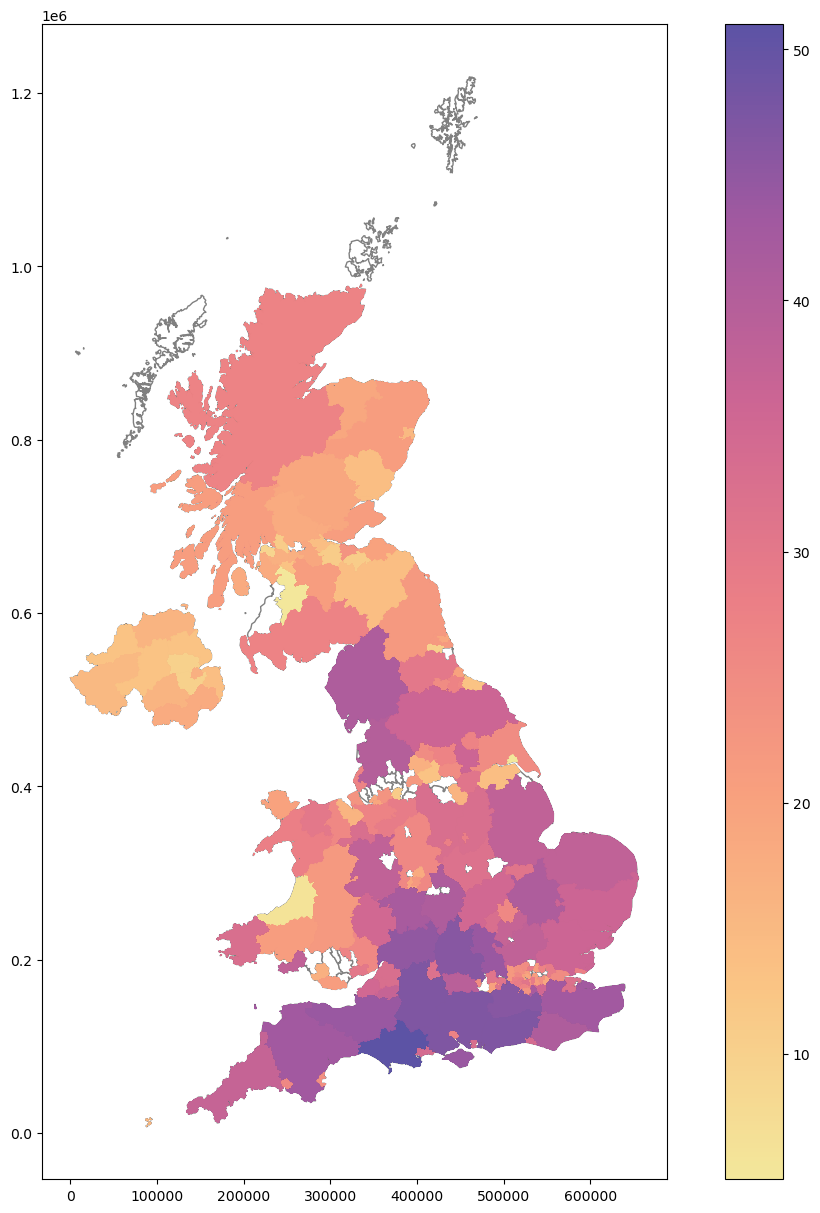

In [32]:
base = GB.plot(color='white', edgecolor='gray', figsize=(15, 15))
y2022_r.plot(column= "RICHNESS", ax=base, figsize=(15, 15), cmap=ptcs.Sunset_7.mpl_colormap, legend = True)
plt.savefig("richness_choropleth.png", bbox_inches='tight')

In [33]:
list(y2022_r)

['ctyua19nm',
 'geometry',
 'SITE_CODE',
 'COUNTRY',
 'SPECIES_CODE',
 'SPECIES',
 'COMMON_NAME',
 'YEAR',
 'SITE_INDEX',
 'Site_Name',
 'Gridreference',
 'Easting',
 'Northing',
 'Length',
 'Country',
 'N_sections',
 'N_yrs_surveyed',
 'First_year_surveyed',
 'Last_year_surveyed',
 'Survey_type',
 'geometry_p',
 'index_right',
 'OBJECTID',
 'ctyua19cd',
 'ctyua19nmw',
 'bng_e',
 'bng_n',
 'long',
 'lat',
 'GlobalID',
 'SHAPE_Length',
 'SHAPE_Area',
 'RICHNESS']

## County Analysis

(-32855.095052635785,
 688441.6486418818,
 -41557.52218944076,
 1027889.9616640668)

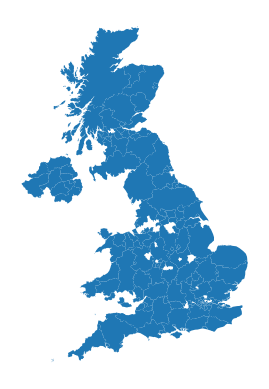

In [35]:
county = y2022_r.dissolve(by='ctyua19nm')

county.plot()
plt.axis('off')
##plt.savefig("ND.png", bbox_inches='tight')

In [36]:
county

geometry  \
ctyua19nm                                                                    
Aberdeen City            POLYGON ((384382.095 800499.941, 383725.105 79...   
Aberdeenshire            POLYGON ((412040.075 840399.584, 409995.648 83...   
Angus                    POLYGON ((325058.959 781387.675, 328595.449 77...   
Antrim and Newtownabbey  POLYGON ((120835.279 553796.394, 122305.159 55...   
Ards and North Down      MULTIPOLYGON (((164364.254 536796.128, 165431....   
...                                                                    ...   
Windsor and Maidenhead   POLYGON ((489489.510 185785.777, 490614.906 18...   
Wirral                   POLYGON ((325938.550 378161.511, 325187.104 37...   
Worcestershire           POLYGON ((397522.046 282621.743, 397581.960 28...   
Wrexham                  POLYGON ((331195.096 356752.888, 333398.180 35...   
York                     POLYGON ((467493.382 456117.782, 466013.303 45...   

                         SITE_CODE           COUNTRY  SPECIES_CODE    SPECIES  \
ctyua19nm                                                                       
Aberdeen City                 5400          Scotland            84  Aglais io   
Aberdeenshire                  146          Scotland            84  Aglais io   
Angus                         2613          Scotland            84  Aglais io   
Antrim and Newtownabbey       3577  Northern Ireland            84  Aglais io   
Ards and North Down           3566  Northern Ireland            84  Aglais io   
...                            ...               ...           ...        ...   
Windsor and Maidenhead        1344           England            84  Aglais io   
Wirral                        2721           England            84  Aglais io   
Worcestershire                  95           England            84  Aglais io   
Wrexham                       3055             Wales            84  Aglais io   
York                          3433           England            84  Aglais io   

                        COMMON_NAME  YEAR  SITE_INDEX  \
ctyua19nm                                               
Aberdeen City               Peacock  2022          26   
Aberdeenshire               Peacock  2022          -2   
Angus                       Peacock  2022         371   
Antrim and Newtownabbey     Peacock  2022          -2   
Ards and North Down         Peacock  2022          -2   
...                             ...   ...         ...   
Windsor and Maidenhead      Peacock  2022          10   
Wirral                      Peacock  2022          -2   
Worcestershire              Peacock  2022          70   
Wrexham                     Peacock  2022          -2   
York                        Peacock  2022          -2   

                                                                 Site_Name  \
ctyua19nm                                                                    
Aberdeen City                                            Kincorth Hill LNR   
Aberdeenshire                                               St Cyrus (new)   
Angus                                                 Crombie Country Park   
Antrim and Newtownabbey                              O'Neills Farm margins   
Ards and North Down      Mount Stewart - National Trust ? 01 ? South Fi...   
...                                                                    ...   
Windsor and Maidenhead                                              Hurley   
Wirral                                                           Red Rocks   
Worcestershire                                                 Wyre Forest   
Wrexham                                                     Marford Quarry   
York                                                            Askham Bog   

                        Gridreference  ...  ctyua19cd  ctyua19nmw   bng_e  \
ctyua19nm                              ...                                  
Aberdeen City                NJ939027  ...  S12000033              387763   
Aberdeens

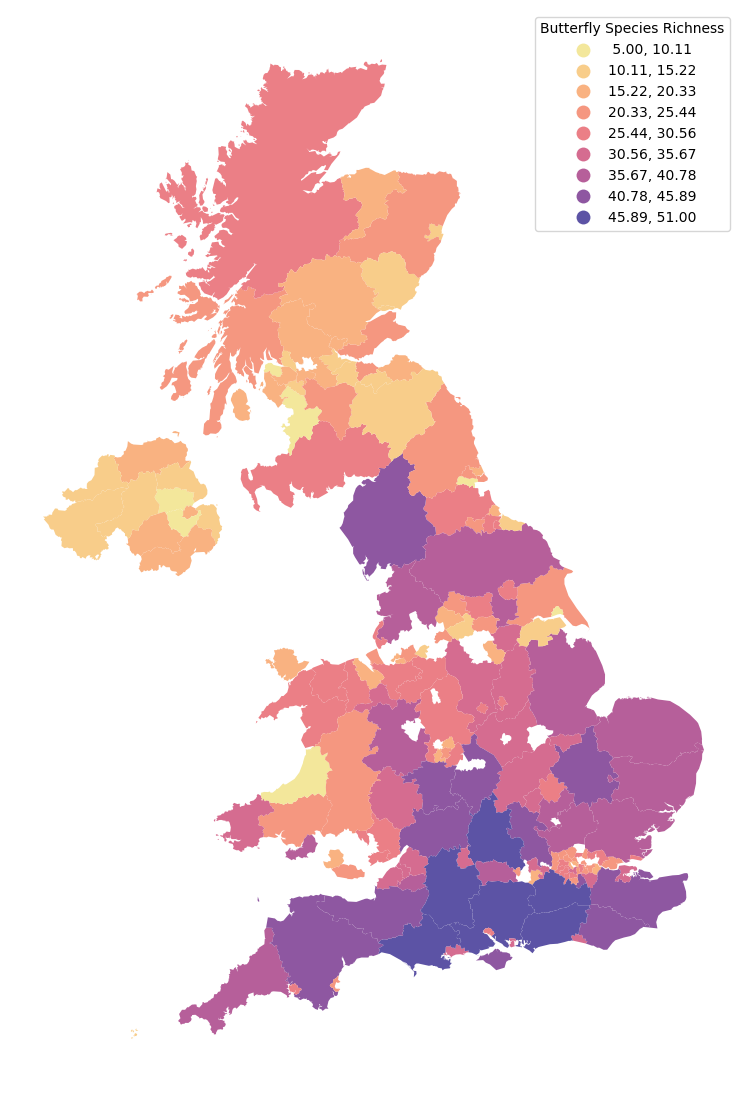

In [37]:
## visualise richness

fig, ax = plt.subplots(1, figsize=(14, 14))
county.plot(column='RICHNESS', cmap=ptcs.Sunset_7.mpl_colormap,
scheme='equalinterval', k=9,
linewidth=2,
legend=True, legend_kwds={"title":"Butterfly Species Richness","loc": 1},
ax=ax
)
ax.set_axis_off()
plt.savefig('choro_richness.png', bbox_inches='tight')

In [221]:
w = weights.KNN.from_dataframe(county, k=8)
w.transform = 'R'

In [222]:
moran = esda.moran.Moran(county['RICHNESS'], w)

In [223]:
round(moran.I,3)
## low positive autocorellation

0.437

In [224]:
moran.p_sim

0.001

In [225]:
county['RICHNESS_lag'] = weights.spatial_lag.lag_spatial(w, county['RICHNESS'])

In [226]:
def standardize(df, var):
    newname = var + '_z'
    df[newname] = (df[var] - df[var].mean()) / df[var].std()
standardize(county,'RICHNESS')
standardize(county,'RICHNESS_lag')

In [227]:
county.tail()

ctyua19nm  \
166  Windsor and Maidenhead   
167                  Wirral   
168          Worcestershire   
169                 Wrexham   
170                    York   

                                              geometry  SITE_CODE  COUNTRY  \
166  POLYGON ((489489.510 185785.777, 490614.906 18...       1344  England   
167  POLYGON ((325938.550 378161.511, 325187.104 37...       2721  England   
168  POLYGON ((397522.046 282621.743, 397581.960 28...         95  England   
169  POLYGON ((331195.096 356752.888, 333398.180 35...       3055    Wales   
170  POLYGON ((467493.382 456117.782, 466013.303 45...       3433  England   

     SPECIES_CODE    SPECIES COMMON_NAME  YEAR  SITE_INDEX       Site_Name  \
166            84  Aglais io     Peacock  2022          10          Hurley   
167            84  Aglais io     Peacock  2022          -2       Red Rocks   
168            84  Aglais io     Peacock  2022          70     Wyre Forest   
169            84  Aglais io     Peacock  2022          -2  Marford Quarry   
170            84  Aglais io     Peacock  2022          -2      Askham Bog   

     ... RICHNESS_lag  RICHNESS_z  RICHNESS_lag_z  quadrant        Is  p-sim  \
166  ...       25.125    0.515511        0.001736        HL -0.255988  0.271   
167  ...       22.750   -0.294155       -0.350680        LL  0.131184  0.316   
168  ...       30.500    1.628803        0.799307        HL -0.891242  0.261   
169  ...       26.000    0.717928        0.131573        HL -0.356503  0.289   
170  ...       23.500    0.110678       -0.239391        HH  0.062657  0.194   

          sig  sigIs  qlabels     slabels  
166  non-sig.    NaN       HL  0 non-sig.  
167  non-sig.    NaN       LL  0 non-sig.  
168  non-sig.    NaN       HL  0 non-sig.  
169  non-sig.    NaN       HL  0 non-sig.  
170  non-sig.    NaN       HH  0 non-sig.  

[5 rows x 43 columns]

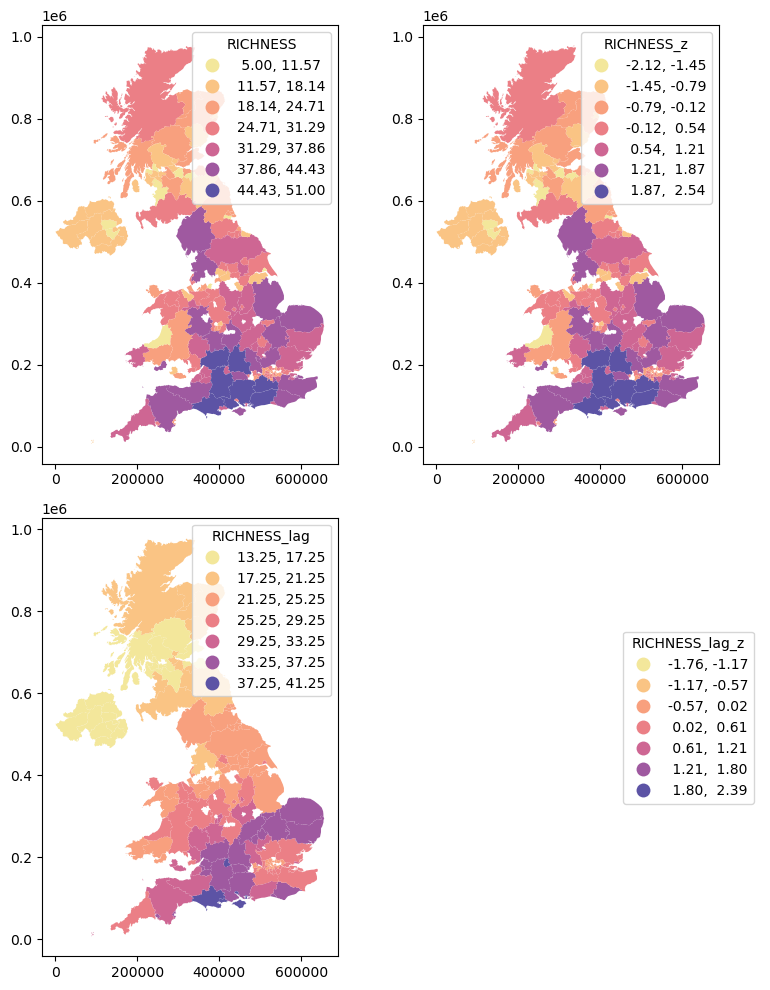

In [228]:
fig, ax = plt.subplots(2,2, figsize=(8,10))
ax=ax.flatten()
mapys = (49,62)
mapxs = (-18,4)
for i, p in enumerate(['RICHNESS',
 'RICHNESS_z','RICHNESS_lag','RICHNESS_lag_z']):
    county.plot(column=p, cmap=ptcs.Sunset_7.mpl_colormap,
             scheme='equalinterval', k=7,
             linewidth=0.,
             legend=True, legend_kwds={"title":p,"loc": 1},
             ax=ax[i]
            )
ax[i].set_ylim(mapys)
ax[i].set_xlim(mapxs)
ax[i].set_axis_off()
fig.tight_layout()
plt.show()

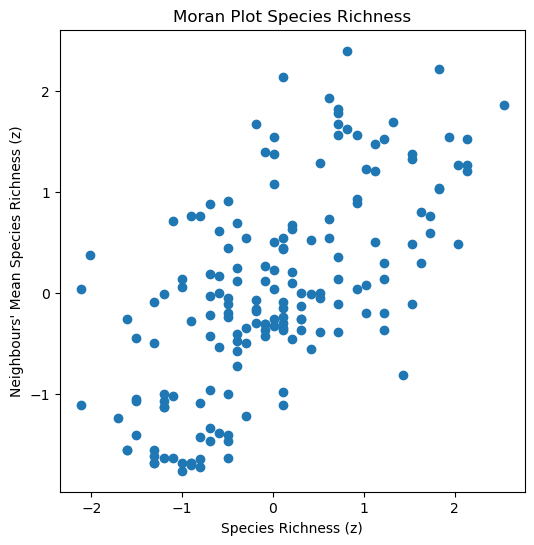

<Figure size 640x480 with 0 Axes>

In [229]:
# Setup the figure and axis
fig, ax = plt.subplots(1, figsize=(6, 6))
# Plot values
plt.scatter(county['RICHNESS_z'], county['RICHNESS_lag_z'])
# Display
ax.set_title('Moran Plot Species Richness')
ax.set_xlabel("Species Richness (z)")
ax.set_ylabel("Neighbours' Mean Species Richness (z)")
plt.show()
plt.savefig("moran_richness_mean.png", bbox_inches='tight')

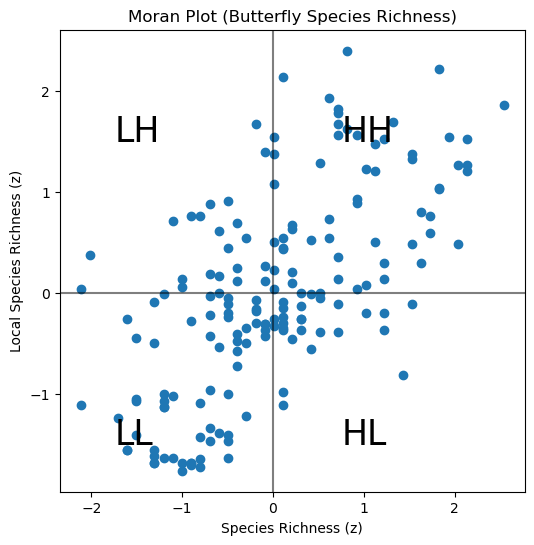

<Figure size 640x480 with 0 Axes>

In [230]:
# Setup the figure and axis
fig, ax = plt.subplots(1, figsize=(6, 6))
# Plot values
plt.scatter(county['RICHNESS_z'], county['RICHNESS_lag_z'])
# Add vertical and horizontal lines through zero
ax.axvline(0, c='k', alpha=0.5)
ax.axhline(0, c='k', alpha=0.5)
# Add text labels for each quadrant
plt.text(0.75, 1.5, "HH", fontsize=25)
plt.text(0.75, -1.5, "HL", fontsize=25)
plt.text(-1.75, 1.5, "LH", fontsize=25)
plt.text(-1.75, -1.5, "LL", fontsize=25)
# Display
ax.set_title('Moran Plot (Butterfly Species Richness)')
ax.set_xlabel("Species Richness (z)")
ax.set_ylabel("Local Species Richness (z)")
plt.show()
plt.savefig("moran_richness_mean_lines.png", bbox_inches='tight')

In [231]:
def rules(row):
    if row['RICHNESS_z'] > 0:
        if row['RICHNESS_lag_z'] > 0:
            return 'HH'
        else:
            return 'HL'
    else:
        if row['RICHNESS_lag_z'] > 0:
            return 'LH'
        else:
            return 'LL'
county['quadrant'] = county.apply(rules, 1)

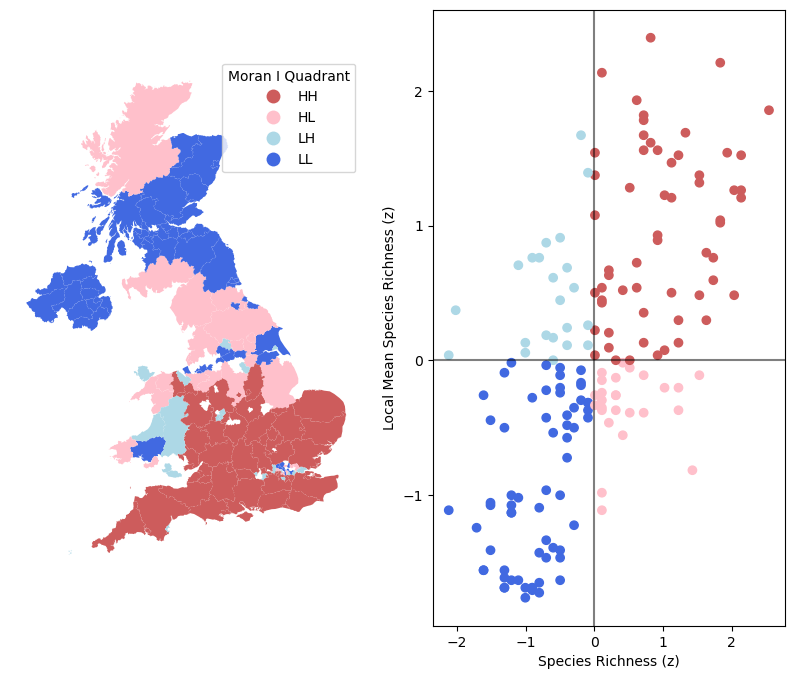

In [232]:
fig, ax = plt.subplots(1,2, figsize=(10,8))
qcolors = {'HH':'indianred', 'HL':'pink', 'LH':'lightblue', 'LL':'royalblue'}

#map
county.plot(column='quadrant', categorical=True, cmap=colors.
            ListedColormap(qcolors.values()), k=2, 
         edgecolor='white', linewidth=0.0,
         legend=True, legend_kwds={"title":'Moran I Quadrant',"loc": 1},
         ax=ax[0])
ax[0].axis('off')
#scatter plot
ax[1].scatter(county['RICHNESS_z'], county['RICHNESS_lag_z'], c=county['quadrant'].map(qcolors))
ax[1].axvline(0, c='k', alpha=0.5)
ax[1].axhline(0, c='k', alpha=0.5)
ax[1].set_xlabel("Species Richness (z)")
ax[1].set_ylabel("Local Mean Species Richness (z)")

plt.savefig("moran_map_scatter.png", bbox_inches='tight')

In [233]:
lisa = esda.moran.Moran_Local(county['RICHNESS'], w)

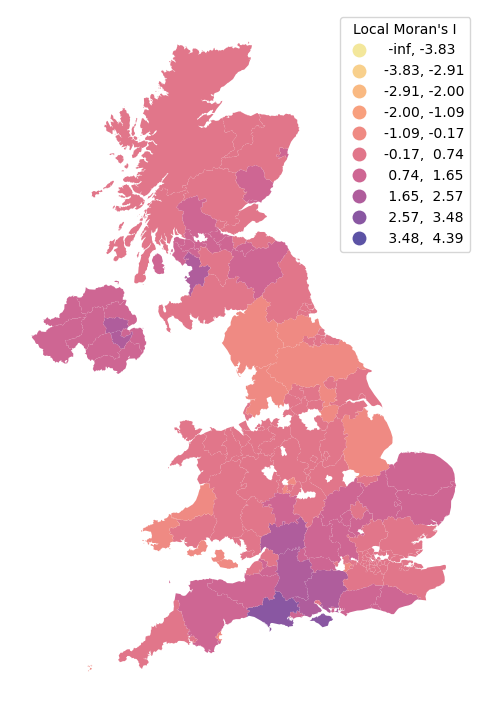

In [234]:
county['Is'] = lisa.Is
fig, ax = plt.subplots(1, figsize=(9, 9))
county.plot(column='Is', cmap=ptcs.Sunset_7.mpl_colormap,
scheme='UserDefined',
classification_kwds= {'bins':[ -3.83, -2.91, -2.00, -1.09,-0.17, 0.74, 1.65, 2.57, 3.48, 4.39]},
linewidth=0.1,
legend=True, legend_kwds={"title":"Local Moran's I","loc": 1},
ax=ax
)
ax.set_axis_off()
plt.savefig("local_moran.png", bbox_inches='tight')

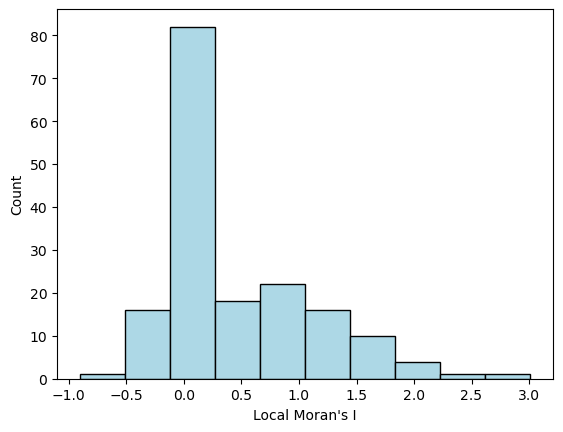

<Figure size 640x480 with 0 Axes>

In [235]:
plt.hist(lisa.Is, 10, facecolor='lightblue', edgecolor='black')
plt.xlabel("Local Moran's I")
plt.ylabel("Count")
plt.show()
plt.savefig("moran_local_hist.png", bbox_inches='tight')

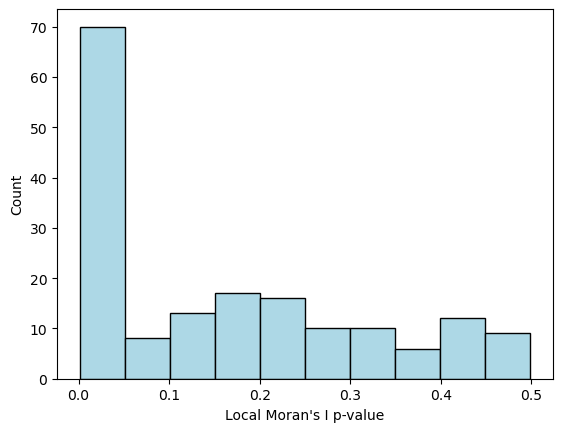

<Figure size 640x480 with 0 Axes>

In [236]:
plt.hist(lisa.p_sim, 10, facecolor='lightblue', edgecolor='black')
plt.xlabel("Local Moran's I p-value")
plt.ylabel("Count")
plt.show()
plt.savefig("local_moran_pval.png", bbox_inches='tight')

In [237]:
county['p-sim'] = lisa.p_sim
sig = 1 * (lisa.p_sim < 0.05)
slabels = ['non-sig.', 'significant']
labels = [slabels[i] for i in sig]
county['sig'] = labels
county[['sig','p-sim']].head()

sig  p-sim
0  significant  0.009
1  significant  0.012
2  significant  0.011
3  significant  0.001
4  significant  0.001

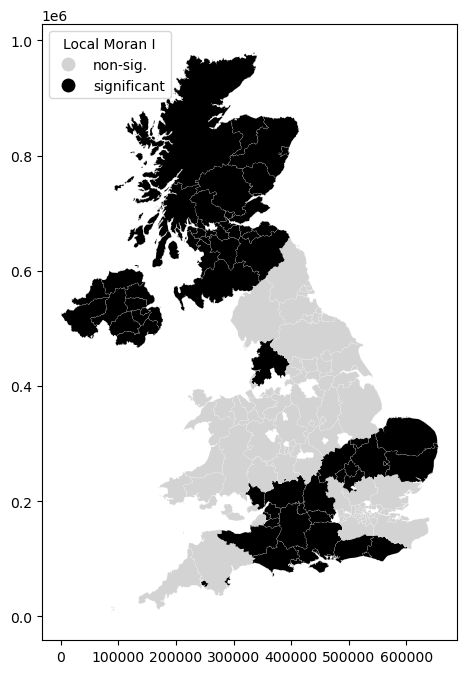

<Figure size 640x480 with 0 Axes>

In [238]:
fig, ax = plt.subplots(1,figsize=(10,8))
sigcolors = {'non-sig.':'lightgrey', 'significant':'black'}
county.plot(column='sig', categorical=True, cmap=colors.ListedColormap(sigcolors.
values()),
k=2, linewidth=0.1, edgecolor='white',
legend=True, legend_kwds={"title":'Local Moran I',"loc": 2},
ax=ax)
plt.show()
plt.savefig("local_moran_sig_map.png", bbox_inches='tight')

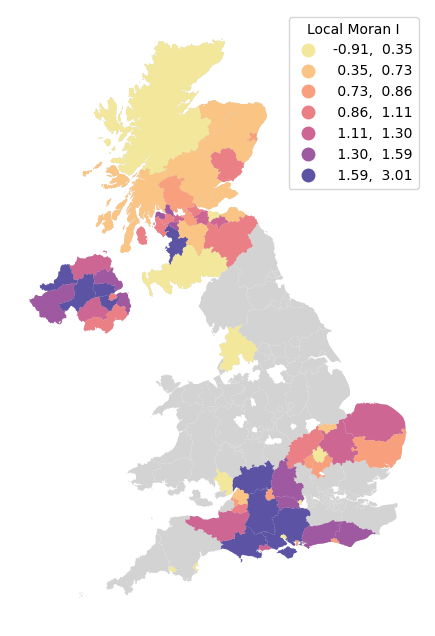

In [239]:
county['sigIs'] = np.where(county['sig'] == 'significant', county['Is'], np.nan)
fig, ax = plt.subplots(1, figsize=(10,8))
county.plot(color='lightgrey',linewidth=0.0,ax=ax)
23
county.plot(column='sigIs', cmap=ptcs.Sunset_7.mpl_colormap, scheme='quantiles',
k=7, edgecolor='white', linewidth=0.0,
legend=True, legend_kwds={"title":'Local Moran I',"loc": 1},
ax=ax)
ax.axis('off')
plt.savefig("local_moran_col", bbox_inches='tight')
plt.show()

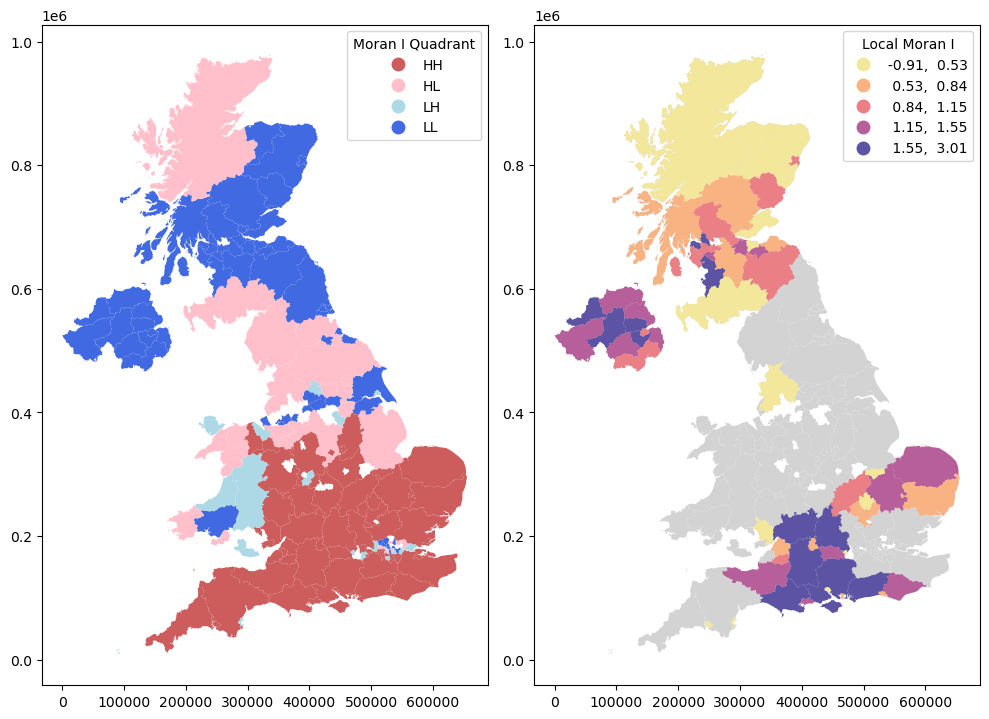

In [240]:
fig, ax = plt.subplots(1,2, figsize=(10,8))
qcolors = {'HH':'indianred', 'HL':'pink', 'LH':'lightblue', 'LL':'royalblue'}
county.plot(column='quadrant', categorical=True, cmap=colors.
ListedColormap(qcolors.values()),
k=2, edgecolor='white', linewidth=0.0,
legend=True, legend_kwds={"title":'Moran I Quadrant',"loc": 1},
ax=ax[0])

county.plot(color='lightgrey',linewidth=0.0,ax=ax[1])
county.plot(column='sigIs', cmap=ptcs.Sunset_7.mpl_colormap, scheme='quantiles',
k=5, edgecolor='white', linewidth=0.0,
legend=True, legend_kwds={"title":'Local Moran I',"loc": 1},
ax=ax[1])
fig.tight_layout()
plt.savefig("local_moran_col_map", bbox_inches='tight')
plt.show()

In [241]:
lisa.q[1:10]

array([3, 3, 3, 3, 3, 3, 3, 1, 1])

In [242]:
counts = [(j,(lisa.q==j).sum()) for j in range(1,5)]
counts

[(1, 53), (2, 17), (3, 69), (4, 32)]

In [243]:
qlabels = ['HH', 'LH', 'LL', 'HL'] #pysal scheme is HH=1, LH=2, LL=3, HL=4
labels = [qlabels[i-1] for i in lisa.q] #list substituting 1-4 with HH-HL
labels[1:10]

['LL', 'LL', 'LL', 'LL', 'LL', 'LL', 'LL', 'HH', 'HH']

In [244]:
county['qlabels'] = labels
[(qlabel, (county['qlabels']==qlabel).sum()) for qlabel in qlabels]

[('HH', 53), ('LH', 17), ('LL', 69), ('HL', 32)]

In [245]:
hotspot = 1 * (sig * lisa.q==1)
coldspot = 3 * (sig * lisa.q==3)
doughnut = 2 * (sig * lisa.q==2)
diamond = 4 * (sig * lisa.q==4)
spots = hotspot + coldspot + doughnut + diamond

spot_labels = [ '0 non-sig.', '1 hot spot', '2 doughnut', '3 cold spot', '4 diamond']
labels = [spot_labels[i] for i in spots]

In [246]:
county['slabels'] = labels
[(spot_label, (county['slabels']==spot_label).sum()) for spot_label in spot_labels]

[('0 non-sig.', 102),
 ('1 hot spot', 28),
 ('2 doughnut', 2),
 ('3 cold spot', 36),
 ('4 diamond', 3)]

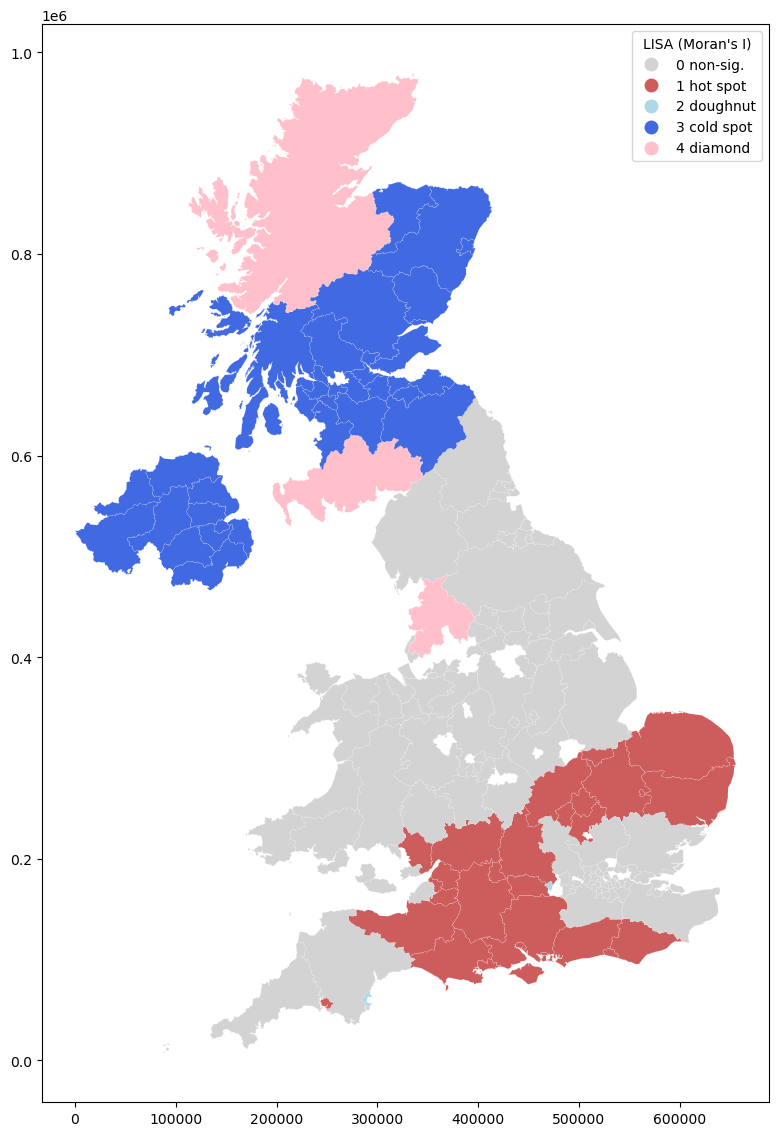

In [247]:
fig, ax = plt.subplots(1, figsize=(14,14))
sigcolors = colors.ListedColormap([ 'lightgrey', 'indianred', 'lightblue', 'royalblue','pink'])
county.plot(column='slabels', categorical=True,
k=2, cmap=sigcolors, linewidth=0.1, edgecolor='white',
legend=True, legend_kwds={"title":"LISA (Moran's I)","loc": 1},
ax=ax)
plt.savefig("LISA MAP", bbox_inches='tight')


In [65]:
IUCN = pd.read_csv('data/IUCN_threatlist.csv')

In [66]:

county = county.reset_index().rename(columns={"index":"ctya19nm"})
county

ctyua19nm  \
0              Aberdeen City   
1              Aberdeenshire   
2                      Angus   
3    Antrim and Newtownabbey   
4        Ards and North Down   
..                       ...   
166   Windsor and Maidenhead   
167                   Wirral   
168           Worcestershire   
169                  Wrexham   
170                     York   

                                              geometry  SITE_CODE  \
0    POLYGON ((384382.095 800499.941, 383725.105 79...       5400   
1    POLYGON ((412040.075 840399.584, 409995.648 83...        146   
2    POLYGON ((325058.959 781387.675, 328595.449 77...       2613   
3    POLYGON ((120835.279 553796.394, 122305.159 55...       3577   
4    MULTIPOLYGON (((164364.254 536796.128, 165431....       3566   
..                                                 ...        ...   
166  POLYGON ((489489.510 185785.777, 490614.906 18...       1344   
167  POLYGON ((325938.550 378161.511, 325187.104 37...       2721   
168  POLYGON ((397522.046 282621.743, 397581.960 28...         95   
169  POLYGON ((331195.096 356752.888, 333398.180 35...       3055   
170  POLYGON ((467493.382 456117.782, 466013.303 45...       3433   

              COUNTRY  SPECIES_CODE    SPECIES COMMON_NAME  YEAR  SITE_INDEX  \
0            Scotland            84  Aglais io     Peacock  2022          26   
1            Scotland            84  Aglais io     Peacock  2022          -2   
2            Scotland            84  Aglais io     Peacock  2022         371   
3    Northern Ireland            84  Aglais io     Peacock  2022          -2   
4    Northern Ireland            84  Aglais io     Peacock  2022          -2   
..                ...           ...        ...         ...   ...         ...   
166           England            84  Aglais io     Peacock  2022          10   
167           England            84  Aglais io     Peacock  2022          -2   
168           England            84  Aglais io     Peacock  2022          70   
169             Wales            84  Aglais io     Peacock  2022          -2   
170           England            84  Aglais io     Peacock  2022          -2   

                                             Site_Name  ... RICHNESS_lag  \
0                                    Kincorth Hill LNR  ...    21.000000   
1                                       St Cyrus (new)  ...    18.800000   
2                                 Crombie Country Park  ...    18.000000   
3                                O'Neills Farm margins  ...    13.800000   
4    Mount Stewart - National Trust ? 01 ? South Fi...  ...    15.000000   
..                                                 ...  ...          ...   
166                                             Hurley  ...    36.666667   
167                                          Red Rocks  ...    27.000000   
168                                        Wyre Forest  ...    32.857143   
169                                     Marford Quarry  ...    25.800000   
170                                         Askham Bog  ...    30.500000   

     RICHNESS_z  RICHNESS_lag_z  quadrant        Is  p-sim          sig  \
0     -1.103822       -0.648850        LL  0.548127  0.383     non-sig.   
1     -0.496572       -0.879524        LL  0.357149  0.053     non-sig.   
2     -1.205030       -0.963405        LL  0.964261  0.084     non-sig.   
3     -1.609863       -1.403781        LL  1.972520  0.002  significant   
4     -1.205030       -1.277959        LL  1.330138  0.026  significant   
..          ...             ...       ...       ...    ...          ...   
166    0.515511        0.993822        HH  0.561405  0.037  significant   
167   -0.294155       -0.019742        LL -0.032557  0.343     non-sig.   
168    1.628803        0.594388        HH  1.145813  0.036  significant   
169    0.717928       -0.145564        HL -0.007733  0.456     non-sig.   
170    0.110678        0.347238        HH  0.051455  0.225     non-sig.   

        sigIs  qlabels      sl

# Vulnerable Analysis

In [67]:
threatlist = y2022_r.merge(IUCN, on='SPECIES', how='left')
threatlist = threatlist.set_geometry('geometry')
threatlist

ctyua19nm                                           geometry  \
0      Aberdeen City  MULTIPOLYGON (((394932.327 799431.079, 392906....   
1      Aberdeen City  MULTIPOLYGON (((394932.327 799431.079, 392906....   
2      Aberdeen City  MULTIPOLYGON (((394932.327 799431.079, 392906....   
3      Aberdeen City  MULTIPOLYGON (((394932.327 799431.079, 392906....   
4      Aberdeen City  MULTIPOLYGON (((394932.327 799431.079, 392906....   
...              ...                                                ...   
41870           York  MULTIPOLYGON (((461650.426 462703.529, 464629....   
41871           York  MULTIPOLYGON (((461650.426 462703.529, 464629....   
41872           York  MULTIPOLYGON (((461650.426 462703.529, 464629....   
41873           York  MULTIPOLYGON (((461650.426 462703.529, 464629....   
41874           York  MULTIPOLYGON (((461650.426 462703.529, 464629....   

       SITE_CODE   COUNTRY  SPECIES_CODE                 SPECIES  \
0           5400  Scotland            84               Aglais io   
1           5400  Scotland             2          Aglais urticae   
2           5400  Scotland             4  Anthocharis cardamines   
3           5400  Scotland             8   Aphantopus hyperantus   
4           5400  Scotland            29   Coenonympha pamphilus   
...          ...       ...           ...                     ...   
41870       5818   England           106      Polyommatus icarus   
41871       5818   England            76        Pyronia tithonus   
41872       5818   England           120   Thymelicus sylvestris   
41873       5818   England           122        Vanessa atalanta   
41874       5818   England           123          Vanessa cardui   

             COMMON_NAME_x  YEAR  SITE_INDEX          Site_Name  ...     long  \
0                  Peacock  2022          26  Kincorth Hill LNR  ... -2.20398   
1      Small Tortoiseshell  2022           1  Kincorth Hill LNR  ... -2.20398   
2               Orange-tip  2022           0  Kincorth Hill LNR  ... -2.20398   
3                  Ringlet  2022         117  Kincorth Hill LNR  ... -2.20398   
4              Small Heath  2022           1  Kincorth Hill LNR  ... -2.20398   
...                    ...   ...         ...                ...  ...      ...   
41870          Common Blue  2022          -2   North Selby Mine  ... -1.07375   
41871           Gatekeeper  2022          -2   North Selby Mine  ... -1.07375   
41872        Small Skipper  2022          -2   North Selby Mine  ... -1.07375   
41873          Red Admiral  2022          -2   North Selby Mine  ... -1.07375   
41874         Painted Lady  2022           3   North Selby Mine  ... -1.07375   

             lat                                GlobalID  SHAPE_Length  \
0      57.166969  {5E1C021A-D847-4518-891E-E385CB67F7AC}      1.158966   
1      57.166969  {5E1C021A-D847-4518-891E-E385CB67F7AC}      1.158966   
2      57.166969  {5E1C021A-D847-4518-891E-E385CB67F7AC}      1.158966   
3      57.166969  {5E1C021A-D847-4518-891E-E385CB67F7AC}      1.158966   
4      57.166969  {5E1C021A-D847-4518-891E-E385CB67F7AC}      1.158966   
...          ...                                     ...           ...   
41870  53.965820  {7D7DE5DD-8B8A-4917-9299-B5A1CAFD6567}      1.030591   
41871  53.965820  {7D7DE5DD-8B8A-4917-9299-B5A1CAFD6567}      1.030591   
41872  53.965820  {7D7DE5DD-8B8A-4917-9299-B5A1CAFD6567}      1.030591   
41873  53.965820  {7D7DE5DD-8B8A-4917-9299-B5A1CAFD6567}      1.030591   
41874  53.965820  {7D7DE5DD-8B8A-4917-9299-B5A1CAFD6567}      1.030591   

      SHAPE_Area  RICHNESS  COMMON_NAME_y  GBRedListcategory  \
0       0.027534        15            NaN                NaN   
1       0.027534        15            NaN                NaN   
2       0.027534        15            NaN                NaN   
3       0.027534        15            NaN                NaN   
4       0.027534        15    Small Heath         Vulnerable   
...          ...       ...            ...      

In [68]:
k = threatlist.groupby('ctyua19nm').nunique('GBRedListcategory')
k

geometry  SITE_CODE  COUNTRY  SPECIES_CODE  SPECIES  \
ctyua19nm                                                                      
Aberdeen City                   1          4        1            15       15   
Aberdeenshire                   1          7        1            21       21   
Angus                           1          4        1            14       14   
Antrim and Newtownabbey         1          1        1            10       10   
Ards and North Down             1          4        1            14       14   
...                           ...        ...      ...           ...      ...   
Windsor and Maidenhead          1          3        1            31       31   
Wirral                          1          6        1            23       23   
Worcestershire                  1         40        1            42       42   
Wrexham                         1          3        1            33       33   
York                            1          4        1            27       27   

                         COMMON_NAME_x  YEAR  SITE_INDEX  Site_Name  \
ctyua19nm                                                             
Aberdeen City                       15     1          22          4   
Aberdeenshire                       21     1          21          7   
Angus                               14     1          17          4   
Antrim and Newtownabbey             10     1           1          1   
Ards and North Down                 14     1          16          4   
...                                ...   ...         ...        ...   
Windsor and Maidenhead              31     1          30          3   
Wirral                              23     1          19          6   
Worcestershire                      42     1         153         40   
Wrexham                             33     1          19          3   
York                                27     1          26          4   

                         Gridreference  ...  long  lat  GlobalID  \
ctyua19nm                               ...                        
Aberdeen City                        4  ...     1    1         1   
Aberdeenshire                        7  ...     1    1         1   
Angus                                4  ...     1    1         1   
Antrim and Newtownabbey              1  ...     1    1         1   
Ards and North Down                  4  ...     1    1         1   
...                                ...  ...   ...  ...       ...   
Windsor and Maidenhead               3  ...     1    1         1   
Wirral                               6  ...     1    1         1   
Worcestershire                      40  ...     1    1         1   
Wrexham                              3  ...     1    1         1   
York                                 4  ...     1    1         1   

                         SHAPE_Length  SHAPE_Area  RICHNESS  COMMON_NAME_y  \
ctyua19nm                                                                    
Aberdeen City                       1           1         1              3   
Aberdeenshire                       1           1         1              7   
Angus                               1           1         1              2   
Antrim and Newtownabbey             1           1         1              0   
Ards and North Down                 1           1         1              0   
...                               ...         ...       ...            ...   
Windsor and Maidenhead              1           1         1              4   
Wirral                              1           1         1              2   
Worcestershire                      1           1         1             13   
Wrexham                             1           1         1              8   
York                                1           1         1              2   

                         GBRedListcategory  EuropeanRedListcategory  \
ctyua19nm                                                             
Aberdeen City     

In [69]:
m = k.loc[:, k.columns.intersection(['ctyua19nm','GBRedListcategory'])]
r = m.rename(columns = {'GBRedListcategory' : "NUM_VUL"})
vul = pd.merge(r, county, on='ctyua19nm')


In [70]:
y2022_v = gpd.GeoDataFrame(vul)  #geopandas
y2022_v.dissolve(by='ctyua19nm')
y2022_v = y2022_v.set_geometry('geometry')

In [71]:
y2022_v['per_vul'] = (y2022_v['NUM_VUL']/y2022_v['RICHNESS'])*100

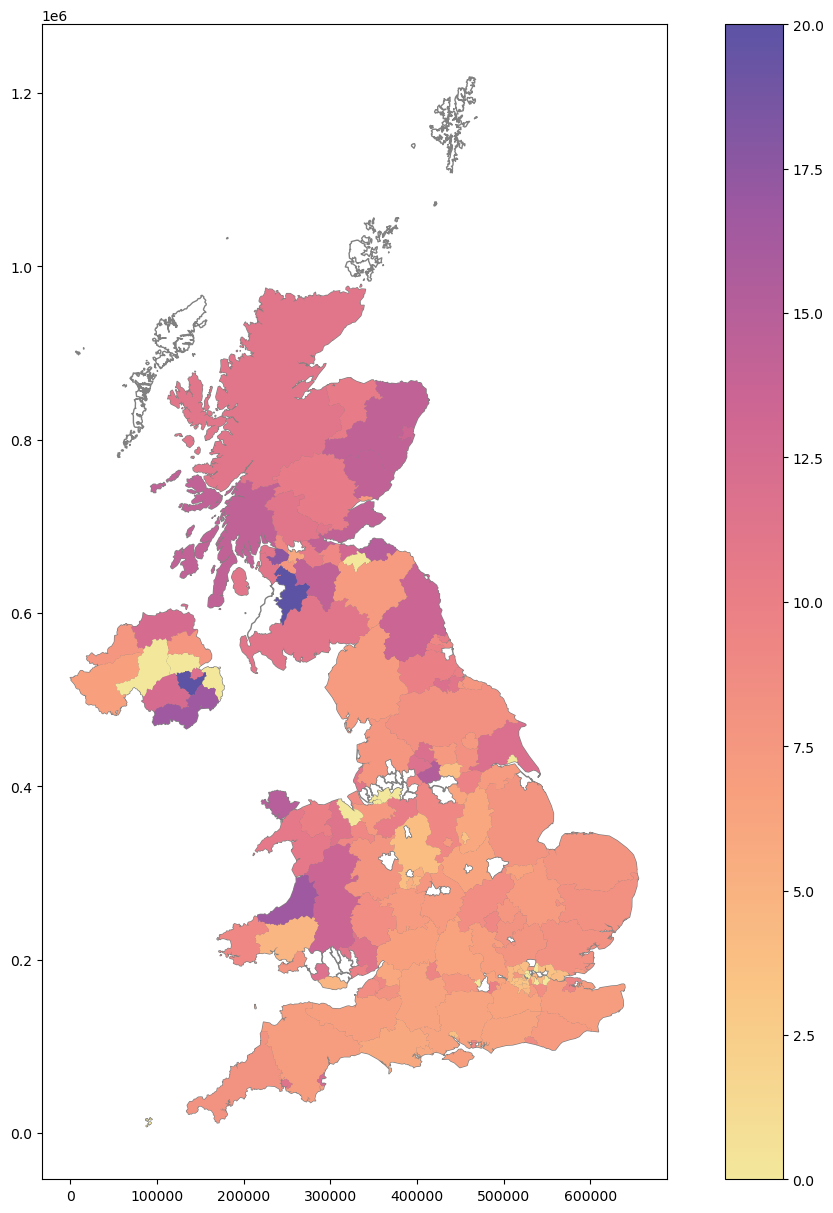

In [72]:
base = GB.plot(color='white', edgecolor='gray', figsize=(15, 15))
y2022_v.plot(column= "per_vul", ax=base, figsize=(15, 15), cmap=ptcs.Sunset_7.mpl_colormap, legend = True)
plt.savefig("threat_choropleth.png", bbox_inches='tight')

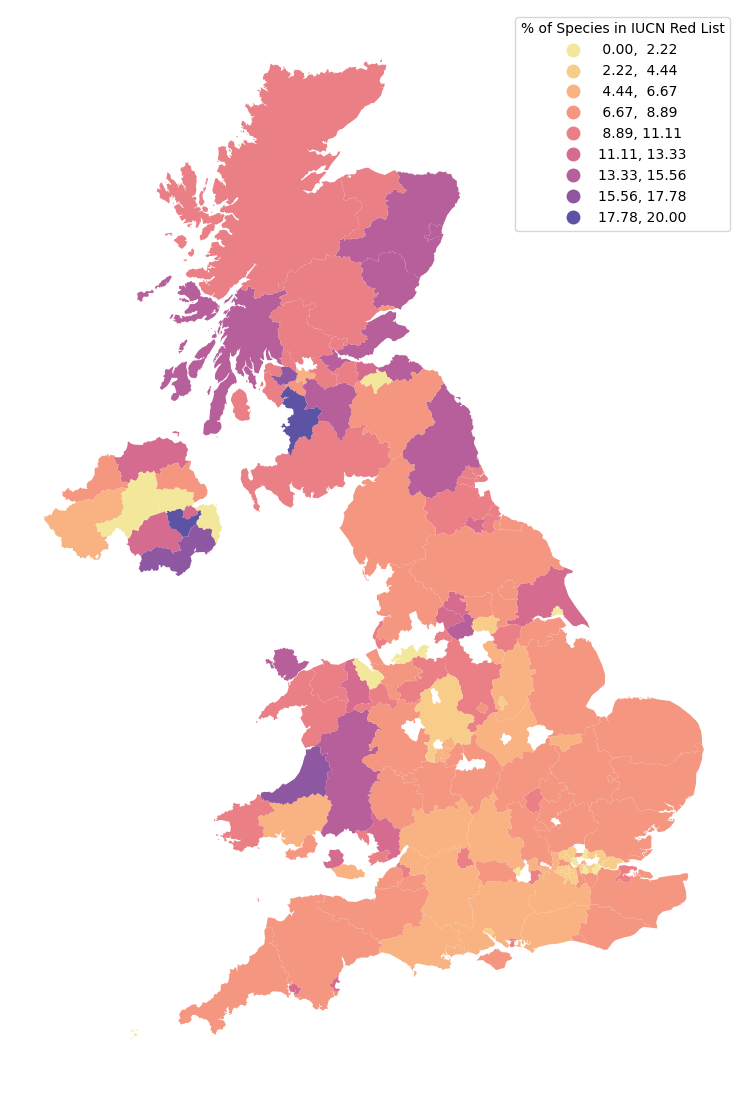

In [73]:
fig, ax = plt.subplots(1, figsize=(14, 14))
y2022_v.plot(column='per_vul', cmap=ptcs.Sunset_7.mpl_colormap,
scheme='equalinterval', k=9,
linewidth=2,
legend=True, legend_kwds={"title":"% of Species in IUCN Red List","loc": 1},
ax=ax
)
ax.set_axis_off()
plt.savefig("choro_threat.png", bbox_inches='tight')

In [74]:
## Spatial autocorellation

In [248]:
w = weights.KNN.from_dataframe(y2022_v, k=8)
w.transform = 'R'

In [249]:
moran = esda.moran.Moran(y2022_v['per_vul'], w)

In [250]:
round(moran.I,3)
## low positive autocorellation

0.265

In [251]:
moran.p_sim

0.001

In [252]:
moran.z_sim

8.0242094611767

In [253]:
y2022_v['per_vul_lag'] = weights.spatial_lag.lag_spatial(w, y2022_v['per_vul'])

In [254]:
def standardize(df, var):
    newname = var + '_z'
    df[newname] = (df[var] - df[var].mean()) / df[var].std()
standardize(y2022_v,'per_vul')
standardize(y2022_v,'per_vul_lag')

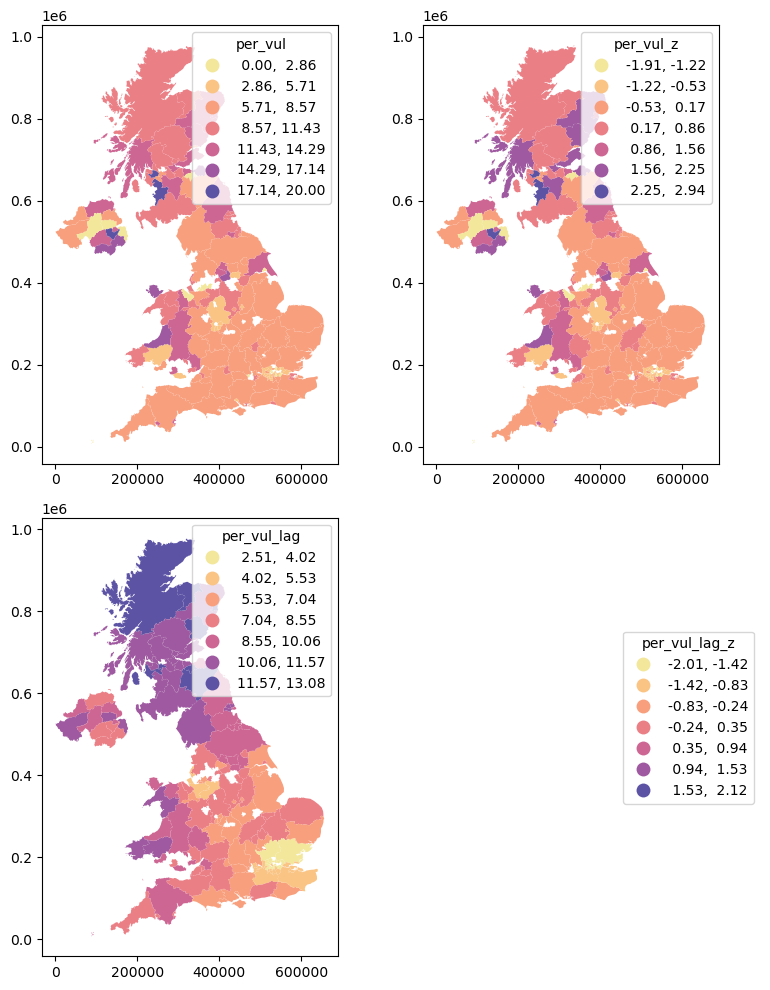

In [255]:
fig, ax = plt.subplots(2,2, figsize=(8,10))
ax=ax.flatten()
mapys = (49,62)
mapxs = (-18,4)
for i, p in enumerate(['per_vul',
 'per_vul_z','per_vul_lag','per_vul_lag_z']):
    y2022_v.plot(column=p, cmap=ptcs.Sunset_7.mpl_colormap,
             scheme='equalinterval', k=7,
             linewidth=0.,
             legend=True, legend_kwds={"title":p,"loc": 1},
             ax=ax[i]
            )
ax[i].set_ylim(mapys)
ax[i].set_xlim(mapxs)
ax[i].set_axis_off()
fig.tight_layout()
plt.show()

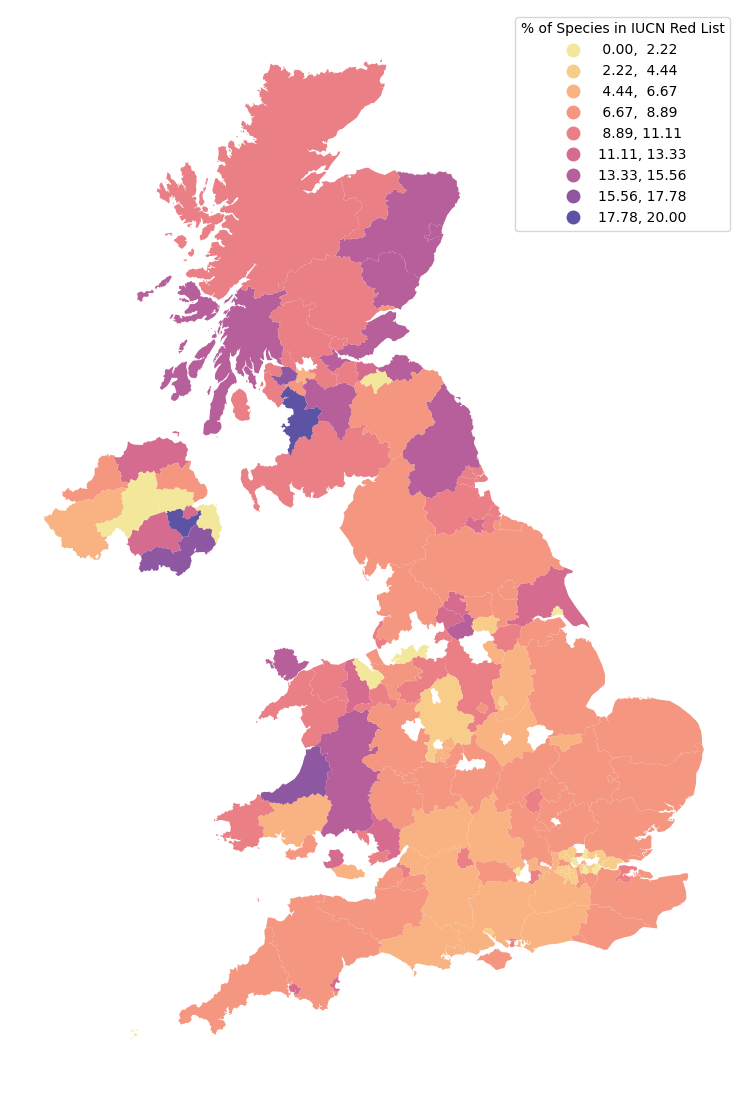

In [256]:
fig, ax = plt.subplots(1, figsize=(14, 14))
y2022_v.plot(column='per_vul', cmap=ptcs.Sunset_7.mpl_colormap,
scheme='equalinterval', k=9,
linewidth=2,
legend=True, legend_kwds={"title":"% of Species in IUCN Red List","loc": 1},
ax=ax
)
ax.set_axis_off()

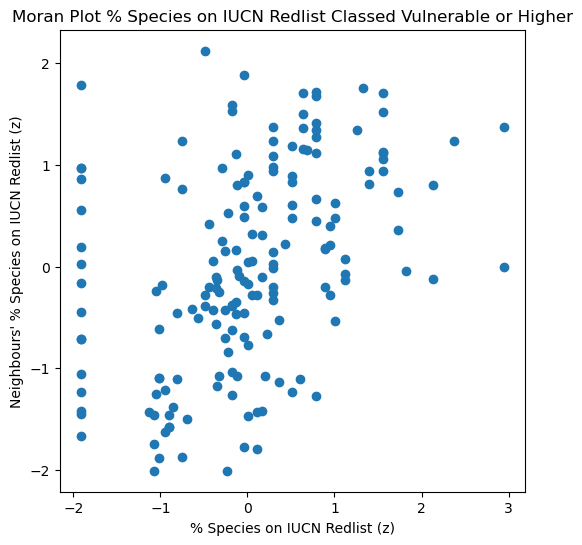

<Figure size 640x480 with 0 Axes>

In [257]:
# Setup the figure and axis
fig, ax = plt.subplots(1, figsize=(6, 6))
# Plot values
plt.scatter(y2022_v['per_vul_z'], y2022_v['per_vul_lag_z'])
# Display
ax.set_title('Moran Plot % Species on IUCN Redlist Classed Vulnerable or Higher')
ax.set_xlabel("% Species on IUCN Redlist (z)")
ax.set_ylabel("Neighbours' % Species on IUCN Redlist (z)")
plt.show()
plt.savefig("moran_threatlist_mean.png", bbox_inches='tight')

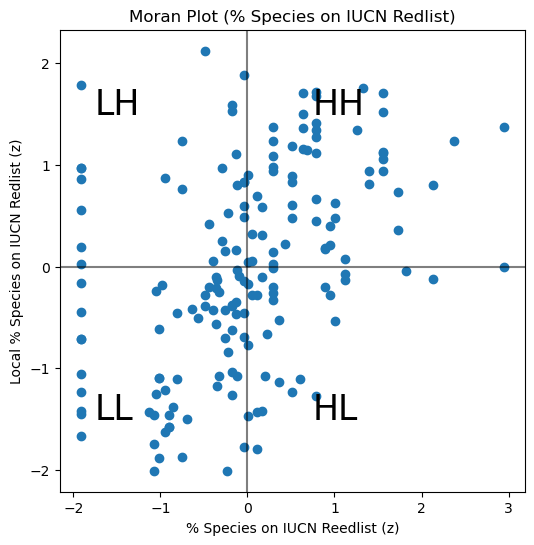

<Figure size 640x480 with 0 Axes>

In [258]:
# Setup the figure and axis
fig, ax = plt.subplots(1, figsize=(6, 6))
# Plot values
plt.scatter(y2022_v['per_vul_z'], y2022_v['per_vul_lag_z'])
# Add vertical and horizontal lines through zero
ax.axvline(0, c='k', alpha=0.5)
ax.axhline(0, c='k', alpha=0.5)
# Add text labels for each quadrant
plt.text(0.75, 1.5, "HH", fontsize=25)
plt.text(0.75, -1.5, "HL", fontsize=25)
plt.text(-1.75, 1.5, "LH", fontsize=25)
plt.text(-1.75, -1.5, "LL", fontsize=25)
# Display
ax.set_title('Moran Plot (% Species on IUCN Redlist)')
ax.set_xlabel("% Species on IUCN Reedlist (z)")
ax.set_ylabel("Local % Species on IUCN Redlist (z)")
plt.show()
plt.savefig("moran_threat_mean_lines.png", bbox_inches='tight')

In [259]:
def rules(row):
    if row['per_vul_z'] > 0:
        if row['per_vul_lag_z'] > 0:
            return 'HH'
        else:
            return 'HL'
    else:
        if row['per_vul_lag_z'] > 0:
            return 'LH'
        else:
            return 'LL'
y2022_v['quadrant'] = y2022_v.apply(rules, 1)

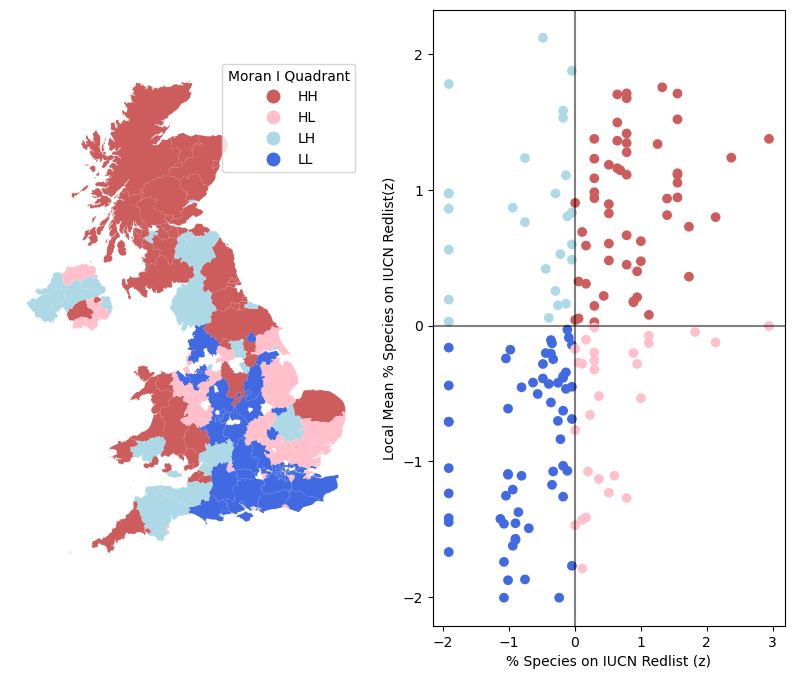

In [260]:
fig, ax = plt.subplots(1,2, figsize=(10,8))
qcolors = {'HH':'indianred', 'HL':'pink', 'LH':'lightblue', 'LL':'royalblue'}

#map
y2022_v.plot(column='quadrant', categorical=True, cmap=colors.
            ListedColormap(qcolors.values()), k=2, 
         edgecolor='white', linewidth=0.0,
         legend=True, legend_kwds={"title":'Moran I Quadrant',"loc": 1},
         ax=ax[0])
ax[0].axis('off')
#scatter plot
ax[1].scatter(y2022_v['per_vul_z'], y2022_v['per_vul_lag_z'], c=y2022_v['quadrant'].map(qcolors))
ax[1].axvline(0, c='k', alpha=0.5)
ax[1].axhline(0, c='k', alpha=0.5)
ax[1].set_xlabel("% Species on IUCN Redlist (z)")
ax[1].set_ylabel("Local Mean % Species on IUCN Redlist(z)")

plt.savefig("threat_moran_map_scatter.png", bbox_inches='tight')

In [261]:
lisa = esda.moran.Moran_Local(y2022_v['per_vul'], w)

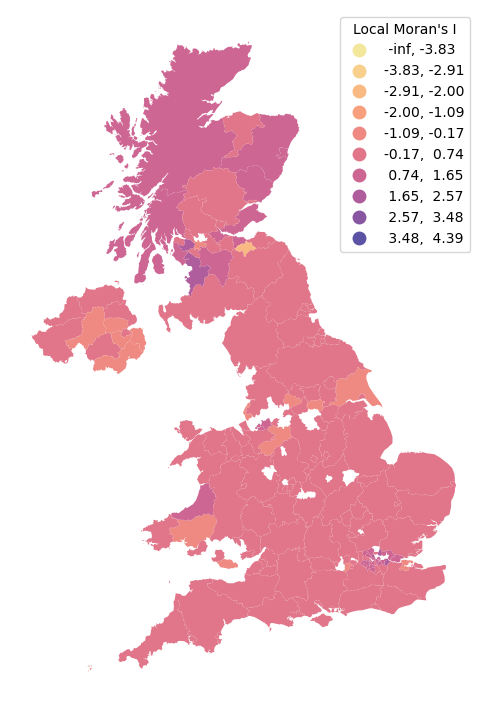

In [262]:
y2022_v['Is'] = lisa.Is
fig, ax = plt.subplots(1, figsize=(9, 9))
y2022_v.plot(column='Is', cmap=ptcs.Sunset_7.mpl_colormap,
scheme='UserDefined',
classification_kwds= {'bins':[ -3.83, -2.91, -2.00, -1.09,-0.17, 0.74, 1.65, 2.57, 3.48, 4.39]},
linewidth=0.1,
legend=True, legend_kwds={"title":"Local Moran's I","loc": 1},
ax=ax
)
ax.set_axis_off()
plt.savefig("threat_local_moran.png", bbox_inches='tight')

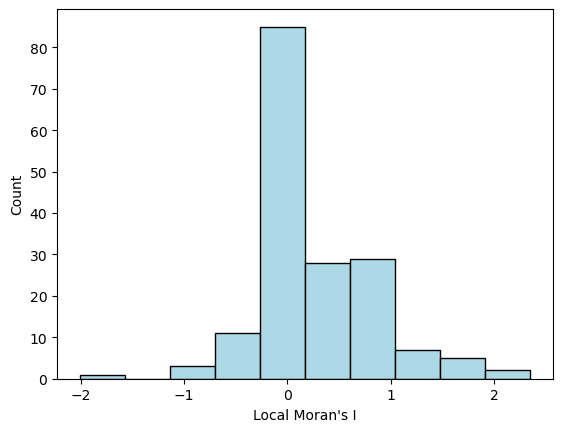

<Figure size 640x480 with 0 Axes>

In [263]:
plt.hist(lisa.Is, 10, facecolor='lightblue', edgecolor='black')
plt.xlabel("Local Moran's I")
plt.ylabel("Count")
plt.show()
plt.savefig("threat_moran_local_hist.png", bbox_inches='tight')

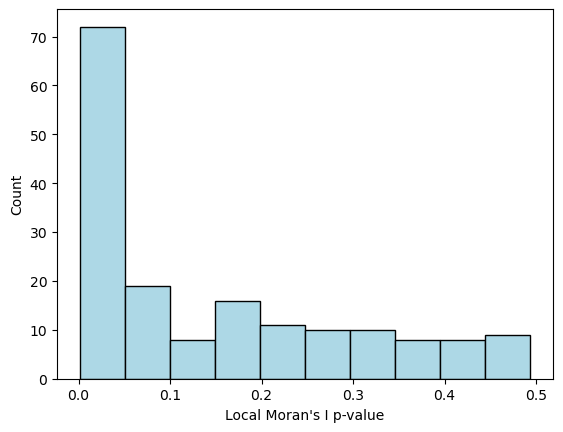

<Figure size 640x480 with 0 Axes>

In [264]:
plt.hist(lisa.p_sim, 10, facecolor='lightblue', edgecolor='black')
plt.xlabel("Local Moran's I p-value")
plt.ylabel("Count")
plt.show()
plt.savefig("threat_local_moran_pval.png", bbox_inches='tight')

In [265]:
y2022_v['p-sim'] = lisa.p_sim
sig = 1 * (lisa.p_sim < 0.05)
slabels = ['non-sig.', 'significant']
labels = [slabels[i] for i in sig]
y2022_v['sig'] = labels
county[['sig','p-sim']].head()

sig  p-sim
0  significant  0.009
1  significant  0.012
2  significant  0.011
3  significant  0.001
4  significant  0.001

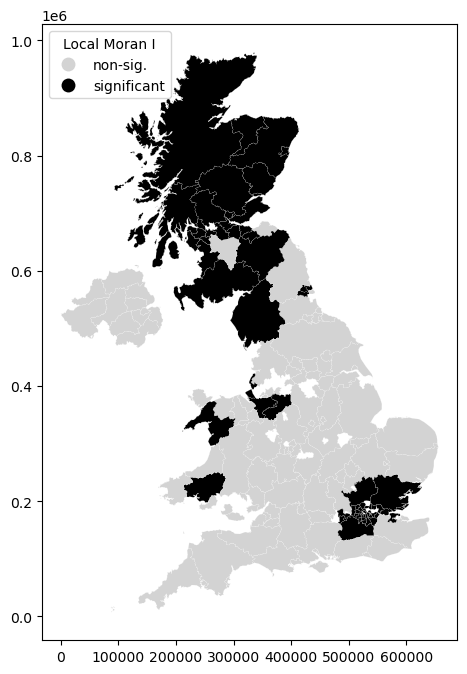

<Figure size 640x480 with 0 Axes>

In [266]:
fig, ax = plt.subplots(1,figsize=(10,8))
sigcolors = {'non-sig.':'lightgrey', 'significant':'black'}
y2022_v.plot(column='sig', categorical=True, cmap=colors.ListedColormap(sigcolors.
values()),
k=2, linewidth=0.1, edgecolor='white',
legend=True, legend_kwds={"title":'Local Moran I',"loc": 2},
ax=ax)
plt.show()
plt.savefig("threat_local_moran_sig_map.png", bbox_inches='tight')

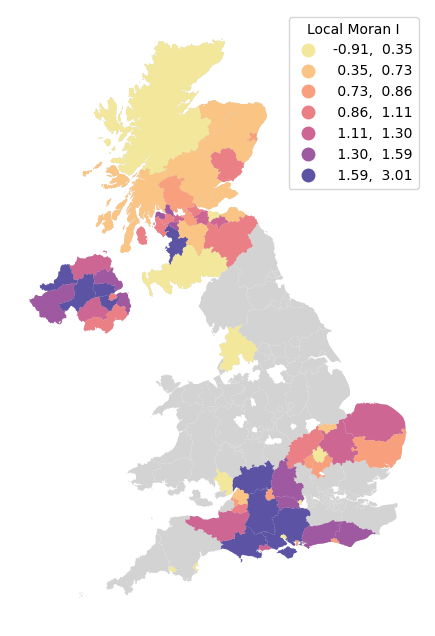

In [267]:
y2022_v['sigIs'] = np.where(county['sig'] == 'significant', county['Is'], np.nan)
fig, ax = plt.subplots(1, figsize=(10,8))
y2022_v.plot(color='lightgrey',linewidth=0.0,ax=ax)
23
y2022_v.plot(column='sigIs', cmap=ptcs.Sunset_7.mpl_colormap, scheme='quantiles',
k=7, edgecolor='white', linewidth=0.0,
legend=True, legend_kwds={"title":'Local Moran I',"loc": 1},
ax=ax)
ax.axis('off')
plt.savefig("threat_local_moran_col", bbox_inches='tight')
plt.show()

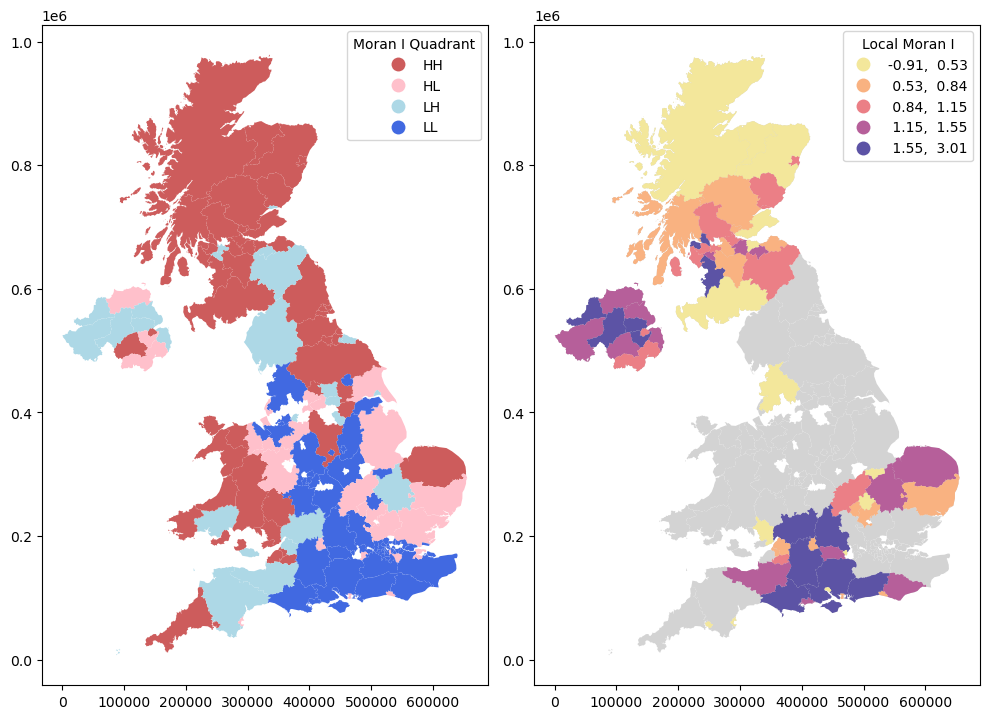

In [268]:
fig, ax = plt.subplots(1,2, figsize=(10,8))
qcolors = {'HH':'indianred', 'HL':'pink', 'LH':'lightblue', 'LL':'royalblue'}
y2022_v.plot(column='quadrant', categorical=True, cmap=colors.
ListedColormap(qcolors.values()),
k=2, edgecolor='white', linewidth=0.0,
legend=True, legend_kwds={"title":'Moran I Quadrant',"loc": 1},
ax=ax[0])

y2022_v.plot(color='lightgrey',linewidth=0.0,ax=ax[1])
y2022_v.plot(column='sigIs', cmap=ptcs.Sunset_7.mpl_colormap, scheme='quantiles',
k=5, edgecolor='white', linewidth=0.0,
legend=True, legend_kwds={"title":'Local Moran I',"loc": 1},
ax=ax[1])
fig.tight_layout()
plt.savefig("threat_local_moran_col_map", bbox_inches='tight')
plt.show()

In [269]:
lisa.q[1:10]

array([1, 1, 2, 2, 1, 4, 3, 1, 3])

In [270]:
counts = [(j,(lisa.q==j).sum()) for j in range(1,5)]
counts

[(1, 51), (2, 25), (3, 63), (4, 32)]

In [271]:
qlabels = ['HH', 'LH', 'LL', 'HL'] #pysal scheme is HH=1, LH=2, LL=3, HL=4
labels = [qlabels[i-1] for i in lisa.q] #list substituting 1-4 with HH-HL
labels[1:10]

['HH', 'HH', 'LH', 'LH', 'HH', 'HL', 'LL', 'HH', 'LL']

In [272]:
y2022_v['qlabels'] = labels
[(qlabel, (y2022_v['qlabels']==qlabel).sum()) for qlabel in qlabels]

[('HH', 51), ('LH', 25), ('LL', 63), ('HL', 32)]

In [273]:
hotspot = 1 * (sig * lisa.q==1)
coldspot = 3 * (sig * lisa.q==3)
doughnut = 2 * (sig * lisa.q==2)
diamond = 4 * (sig * lisa.q==4)
spots = hotspot + coldspot + doughnut + diamond

spot_labels = [ '0 non-sig.', '1 hot spot', '2 doughnut', '3 cold spot', '4 diamond']
labels = [spot_labels[i] for i in spots]

In [274]:
y2022_v['slabels'] = labels
[(spot_label, (y2022_v['slabels']==spot_label).sum()) for spot_label in spot_labels]

[('0 non-sig.', 102),
 ('1 hot spot', 24),
 ('2 doughnut', 7),
 ('3 cold spot', 29),
 ('4 diamond', 9)]

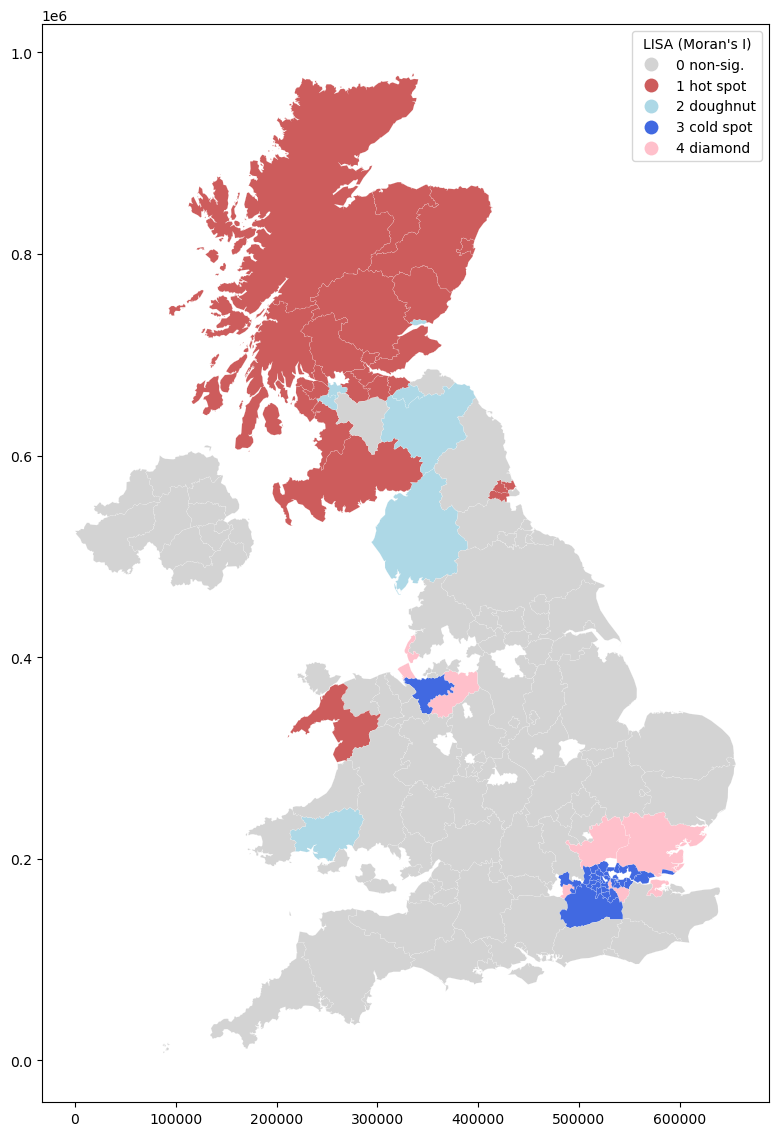

In [275]:
fig, ax = plt.subplots(1, figsize=(14,14))
sigcolors = colors.ListedColormap([ 'lightgrey', 'indianred', 'lightblue', 'royalblue','pink'])
y2022_v.plot(column='slabels', categorical=True,
k=2, cmap=sigcolors, linewidth=0.1, edgecolor='white',
legend=True, legend_kwds={"title":"LISA (Moran's I)","loc": 1},
ax=ax)
plt.savefig("threat LISA MAP", bbox_inches='tight')
plt.show()

In [101]:
## regular corellation

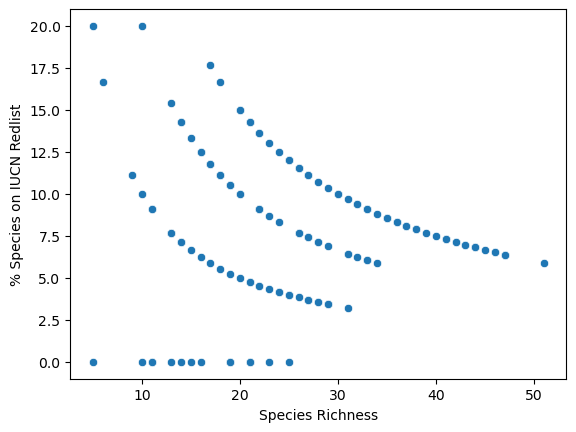

In [109]:
sns.scatterplot(data=y2022_v, x="RICHNESS", y="per_vul")

# Set x-axis label
plt.xlabel('Species Richness')
# Set y-axis label
plt.ylabel('% Species on IUCN Redlist')
plt.savefig('vul_rich_scatter.png', bbox_inches = 'tight')

In [110]:
y2022_v['per_vul'].corr(y2022_v['RICHNESS'], method= 'kendall')


-0.15687107997090152

In [282]:
import scipy.stats as ss
ss.kendalltau(y2022_v['RICHNESS'], h['SITE_CODE'])

SignificanceResult(statistic=-0.41590527084748785, pvalue=1.5981336190121644e-15)

In [281]:
import scipy.stats as ss
ss.kendalltau(y2022_v['per_vul'], y2022_v['RICHNESS'])

SignificanceResult(statistic=-0.15687107997090152, pvalue=0.0029976050196851315)

In [111]:
h = y2022_r.groupby('ctyua19nm').nunique()

In [112]:
h = h.loc[:, h.columns.intersection(['ctyua19nm','SITE_CODE'])]
h = h.rename(columns = {'SITE_CODE' : "NUM_SITES"})
h = pd.merge(h, y2022_v, on='ctyua19nm')

In [113]:
h

ctyua19nm  NUM_SITES  NUM_VUL  \
0              Aberdeen City          4        2   
1              Aberdeenshire          7        3   
2                      Angus          4        2   
3    Antrim and Newtownabbey          1        0   
4        Ards and North Down          4        0   
..                       ...        ...      ...   
166   Windsor and Maidenhead          3        2   
167                   Wirral          6        2   
168           Worcestershire         40        3   
169                  Wrexham          3        3   
170                     York          4        2   

                                              geometry  SITE_CODE  \
0    POLYGON ((384382.095 800499.941, 383725.105 79...       5400   
1    POLYGON ((412040.075 840399.584, 409995.648 83...        146   
2    POLYGON ((325058.959 781387.675, 328595.449 77...       2613   
3    POLYGON ((120835.279 553796.394, 122305.159 55...       3577   
4    MULTIPOLYGON (((164364.254 536796.128, 165431....       3566   
..                                                 ...        ...   
166  POLYGON ((489489.510 185785.777, 490614.906 18...       1344   
167  POLYGON ((325938.550 378161.511, 325187.104 37...       2721   
168  POLYGON ((397522.046 282621.743, 397581.960 28...         95   
169  POLYGON ((331195.096 356752.888, 333398.180 35...       3055   
170  POLYGON ((467493.382 456117.782, 466013.303 45...       3433   

              COUNTRY  SPECIES_CODE    SPECIES COMMON_NAME  YEAR  ...  \
0            Scotland            84  Aglais io     Peacock  2022  ...   
1            Scotland            84  Aglais io     Peacock  2022  ...   
2            Scotland            84  Aglais io     Peacock  2022  ...   
3    Northern Ireland            84  Aglais io     Peacock  2022  ...   
4    Northern Ireland            84  Aglais io     Peacock  2022  ...   
..                ...           ...        ...         ...   ...  ...   
166           England            84  Aglais io     Peacock  2022  ...   
167           England            84  Aglais io     Peacock  2022  ...   
168           England            84  Aglais io     Peacock  2022  ...   
169             Wales            84  Aglais io     Peacock  2022  ...   
170           England            84  Aglais io     Peacock  2022  ...   

           Is  p-sim          sig     sigIs  qlabels     slabels    per_vul  \
0    2.060103  0.086     non-sig.       NaN       HH  0 non-sig.  13.333333   
1    1.540096  0.022  significant       NaN       HH  1 hot spot  14.285714   
2    1.047225  0.112     non-sig.       NaN       HH  0 non-sig.  14.285714   
3   -1.167003  0.091     non-sig.  1.972520       LH  0 non-sig.   0.000000   
4   -3.838957  0.001  significant  1.330138       LH  2 doughnut   0.000000   
..        ...    ...          ...       ...      ...         ...        ...   
166  0.008332  0.491     non-sig.  0.561405       LL  0 non-sig.   6.451613   
167 -0.022704  0.460     non-sig.       NaN       HL  0 non-sig.   8.695652   
168  0.048986  0.242     non-sig.  1.145813       LL  0 non-sig.   7.142857   
169  0.015461  0.436     non-sig.       NaN       HH  0 non-sig.   9.090909   
170 -0.063601  0.215     non-sig.       NaN       LH  0 non-sig.   7.407407   

     per_vul_lag  per_vul_z  per_vul_lag_z  
0      14.285714   1.324335       2.157686  
1      11.956558   1.555576       1.367981  
2      10.651629   1.555576       0.925543  
3      10.391403  -1.913047       0.837313  
4      16.143791  -1.913047       2.787671  
..           ...        ...            ...  
166     7.779974  -0.346572      -0.048098  
167     7.407407   0.198289      -0.174417  
168     6.750218  -0.178735      -0.397238  
169     8.095394   0.294259       0.058846  
170    10.166667  -0.114502       0.761115  

[171 rows x 49 columns]

In [150]:
h['SITE_CODE'].corr(y2022_v['RICHNESS'], method= 'kendall')

-0.4159052708474879

In [285]:
h.loc[(h['NUM_SITES']==153)]

ctyua19nm  NUM_SITES  NUM_VUL  \
68  Hampshire        153        3   

                                             geometry  SITE_CODE  COUNTRY  \
68  MULTIPOLYGON (((487685.736 148666.089, 485531....          8  England   

    SPECIES_CODE    SPECIES COMMON_NAME  YEAR  ...        Is  p-sim       sig  \
68            84  Aglais io     Peacock  2022  ...  0.091836  0.228  non-sig.   

       sigIs  qlabels     slabels   per_vul  per_vul_lag  per_vul_z  \
68  2.660998       LL  0 non-sig.  6.382979     6.837703  -0.363237   

    per_vul_lag_z  
68      -0.367576  

[1 rows x 49 columns]

In [288]:
h.loc[(h['ctyua19nm']== 'Hampshire')]

ctyua19nm  NUM_SITES  NUM_VUL  \
68  Hampshire        153        3   

                                             geometry  SITE_CODE  COUNTRY  \
68  MULTIPOLYGON (((487685.736 148666.089, 485531....          8  England   

    SPECIES_CODE    SPECIES COMMON_NAME  YEAR  ...        Is  p-sim       sig  \
68            84  Aglais io     Peacock  2022  ...  0.091836  0.228  non-sig.   

       sigIs  qlabels     slabels   per_vul  per_vul_lag  per_vul_z  \
68  2.660998       LL  0 non-sig.  6.382979     6.837703  -0.363237   

    per_vul_lag_z  
68      -0.367576  

[1 rows x 49 columns]

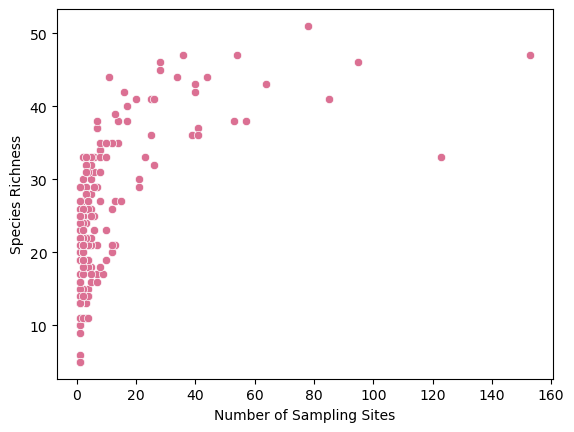

In [149]:
sns.scatterplot(data=h, y="RICHNESS", x="NUM_SITES", color='palevioletred')

# Set x-axis label
plt.ylabel('Species Richness')
# Set y-axis label
plt.xlabel('Number of Sampling Sites')
plt.savefig('count_rich_scatter.png', bbox_inches = 'tight')

In [116]:
y2022_r.SPECIES.mode()

0    Maniola jurtina
Name: SPECIES, dtype: object

In [131]:
species_df = y2022_r.groupby('SPECIES').nunique()
species_df= species_df.reset_index().rename(columns={"index":"SPECIES"})
species_df

SPECIES  ctyua19nm  geometry  SITE_CODE  COUNTRY  \
0                       Aglais io        169       169       1798        4   
1                  Aglais urticae        165       165       1606        4   
2          Anthocharis cardamines        159       159       1632        4   
3                    Apatura iris         24        24        120        1   
4           Aphantopus hyperantus        166       166       1758        4   
5                 Argynnis paphia         80        80        805        3   
6                  Aricia agestis         83        83        832        2   
7               Aricia artaxerxes         12        12         44        2   
8              Boloria euphrosyne         24        24        107        3   
9                  Boloria selene         43        43        149        3   
10                Callophrys rubi         82        82        573        4   
11       Carterocephalus palaemon          2         2          2        1   
12            Celastrina argiolus        123       123       1236        4   
13          Coenonympha pamphilus        139       139       1241        4   
14             Coenonympha tullia         13        13         19        4   
15                 Colias croceus         73        73        490        2   
16                 Cupido minimus         41        41        261        3   
17                Erebia aethiops          7         7         16        2   
18                Erebia epiphron          4         4          4        2   
19                  Erynnis tages         69        69        572        4   
20             Euphydryas aurinia         20        20         91        4   
21              Fabriciana adippe          8         8         29        1   
22               Favonius quercus         78        78        481        4   
23              Gonepteryx rhamni        113       113       1428        2   
24                Hamearis lucina         19        19         79        1   
25                 Hesperia comma         11        11         63        1   
26              Hipparchia semele         44        44        221        4   
27              Lasiommata megera         77        77        458        3   
28             Leptidea juvernica          4         4          6        1   
29               Leptidea sinapis         18        18         62        1   
30              Limenitis camilla         35        35        311        1   
31                Lycaena phlaeas        151       151       1301        4   
32                Maniola jurtina        167       167       1873        4   
33            Melanargia galathea         91        91       1056        2   
34               Melitaea athalia          4         4         12        1   
35                Melitaea cinxia          4         4         10        1   
36              Ochlodes sylvanus        125       125       1447        3   
37                Papilio machaon          6         6         14        1   
38                Pararge aegeria        158       158       1750        4   
39                Phengaris arion          2         2          3        1   
40               Pieris brassicae        165       165       1795        4   
41                    Pieris napi        167       167       1709        4   
42                   Pieris rapae        167       167       1823        4   
43                 Plebejus argus         15        15        114        2   
44              Polygonia c-album        141       141       1506        3   
45          Polyommatus bellargus         21        21        156        1   
46            Polyommatus coridon         28        28        250        1   
47             Polyommatus icarus        154       154       1584        4   
48                  Pyrgus malvae         42        42        347        2   
49               Pyronia tithonus        119       119       1571        2   
50                 Satyrium pruni          6    

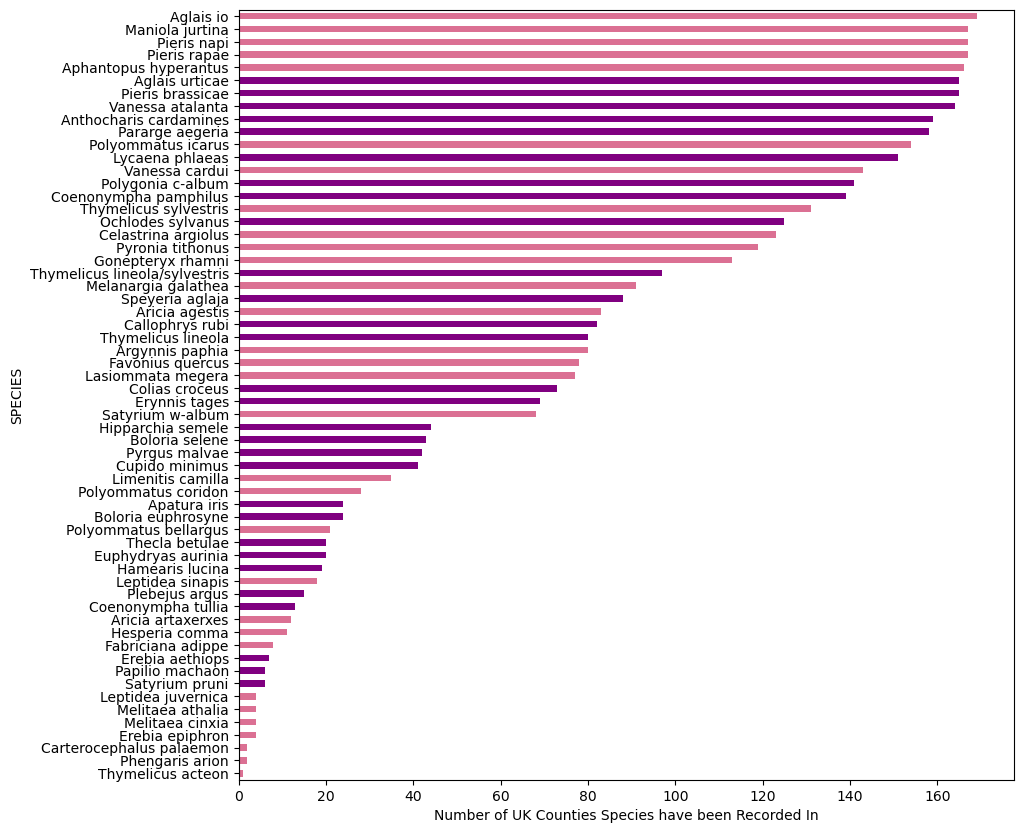

In [219]:
color1 = ["purple" if i in threats else "palevioletred" for i in species_df['SPECIES']]
species_df.sort_values("ctyua19nm").plot.barh(x='SPECIES', y ='ctyua19nm', figsize=(10, 10), legend = False, color= color1,)
plt.xlabel('Number of UK Counties Species have been Recorded In')
plt.savefig('species_bar.png', bbox_inches = 'tight')

In [118]:
species_df.loc[(species_df['ctyua19nm']== 1)]

ctyua19nm  geometry  SITE_CODE  COUNTRY  SPECIES_CODE  \
SPECIES                                                                    
Thymelicus acteon          1         1         17        1             1   

                   COMMON_NAME  YEAR  SITE_INDEX  Site_Name  Gridreference  \
SPECIES                                                                      
Thymelicus acteon            1     1           9         17             17   

                   ...  ctyua19cd  ctyua19nmw  bng_e  bng_n  long  lat  \
SPECIES            ...                                                   
Thymelicus acteon  ...          1           1      1      1     1    1   

                   GlobalID  SHAPE_Length  SHAPE_Area  RICHNESS  
SPECIES                                                          
Thymelicus acteon         1             1           1         1  

[1 rows x 32 columns]

In [119]:
y2022_r.loc[(y2022_r['SPECIES']== 'Phengaris arion' )]

ctyua19nm                                           geometry  \
15379  Gloucestershire  MULTIPOLYGON (((416008.324 246055.232, 417496....   
31180         Somerset  MULTIPOLYGON (((330857.336 156233.907, 332223....   
31231         Somerset  MULTIPOLYGON (((330857.336 156233.907, 332223....   

       SITE_CODE  COUNTRY  SPECIES_CODE          SPECIES COMMON_NAME  YEAR  \
15379       5603  England            73  Phengaris arion  Large Blue  2022   
31180       2595  England            73  Phengaris arion  Large Blue  2022   
31231       4504  England            73  Phengaris arion  Large Blue  2022   

       SITE_INDEX               Site_Name  ...  ctyua19cd  ctyua19nmw   bng_e  \
15379          -2  Painswick Beacon North  ...  E10000013              389595   
31180          59              Green Down  ...  E10000027              309300   
31231          51            Collard Hill  ...  E10000027              309300   

        bng_n     long        lat                                GlobalID  \
15379  213465 -2.15235  51.819710  {9B31FC02-7729-4CEC-B9AF-B647184A9E22}   
31180  131077 -3.29595  51.071819  {AFC31ED0-AA67-46A6-9D08-8403C81E7E73}   
31231  131077 -3.29595  51.071819  {AFC31ED0-AA67-46A6-9D08-8403C81E7E73}   

       SHAPE_Length  SHAPE_Area RICHNESS  
15379      4.149054    0.350303       45  
31180      4.618326    0.444592       44  
31231      4.618326    0.444592       44  

[3 rows x 33 columns]

In [127]:
pl = y2022_r.loc[(y2022_r['SPECIES']== 'Vanessa cardui')]
pl.groupby('ctyua19nm').nunique()

geometry  SITE_CODE  COUNTRY  SPECIES_CODE  \
ctyua19nm                                                                  
Aberdeenshire                        1          1        1             1   
Angus                                1          3        1             1   
Ards and North Down                  1          2        1             1   
Barnet                               1          1        1             1   
Bath and North East Somerset         1          4        1             1   
...                                ...        ...      ...           ...   
Wiltshire                            1         47        1             1   
Windsor and Maidenhead               1          2        1             1   
Wirral                               1          2        1             1   
Worcestershire                       1         28        1             1   
York                                 1          2        1             1   

                              SPECIES  COMMON_NAME  YEAR  SITE_INDEX  \
ctyua19nm                                                              
Aberdeenshire                       1            1     1           1   
Angus                               1            1     1           2   
Ards and North Down                 1            1     1           2   
Barnet                              1            1     1           1   
Bath and North East Somerset        1            1     1           3   
...                               ...          ...   ...         ...   
Wiltshire                           1            1     1          10   
Windsor and Maidenhead              1            1     1           2   
Wirral                              1            1     1           1   
Worcestershire                      1            1     1          11   
York                                1            1     1           2   

                              Site_Name  Gridreference  ...  ctyua19cd  \
ctyua19nm                                               ...              
Aberdeenshire                         1              1  ...          1   
Angus                                 3              3  ...          1   
Ards and North Down                   2              2  ...          1   
Barnet                                1              1  ...          1   
Bath and North East Somerset          4              4  ...          1   
...                                 ...            ...  ...        ...   
Wiltshire                            47             47  ...          1   
Windsor and Maidenhead                2              2  ...          1   
Wirral                                2              2  ...          1   
Worcestershire                       28             28  ...          1   
York                                  2              2  ...          1   

                              ctyua19nmw  bng_e  bng_n  long  lat  GlobalID  \
ctyua19nm                                                                     
Aberdeenshire                          1      1      1     1    1         1   
Angus                                  1      1      1     1    1         1   
Ards and North Down                    1      1      1     1    1         1   
Barnet                                 1      1      1     1    1         1   
Bath and North East Somerset           1      1      1     1    1         1   
...                                  ...    ...    ...   ...  ...       ...   
Wiltshire                              1      1      1     1    1         1   
Windsor and Maidenhead                 1      1      1     1    1         1   
Wirral                                 1      1      1     1    1         1   
Worcestershire                         1      1      1     1    1         1   
York                                   1      1      1     1    1         1   

                              SHAPE_Length  SHAPE_Area  RICHNESS  
ctyua19nm                                     

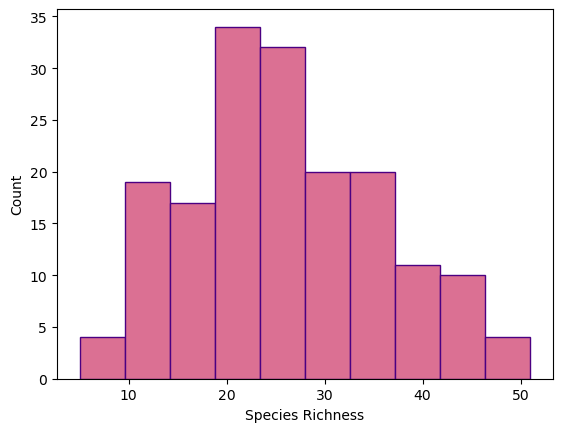

In [120]:
plt.hist(county["RICHNESS"], bins=10, facecolor='palevioletred', edgecolor = 'indigo',)
plt.xlabel('Species Richness')
plt.ylabel('Count')
plt.savefig('total_hist.png', bbox_inches = 'tight')

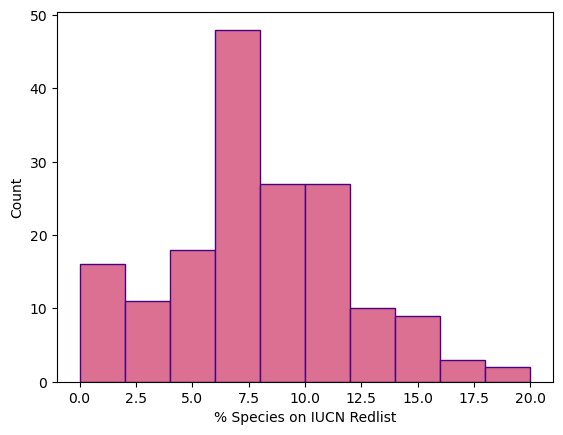

In [121]:
plt.hist(y2022_v["per_vul"], bins=10, facecolor='palevioletred', edgecolor = 'indigo',)
plt.xlabel('% Species on IUCN Redlist')
plt.ylabel('Count')
plt.savefig('IUCN_hist.png', bbox_inches = 'tight')

In [156]:
county["RICHNESS"].describe()

count    171.000000
mean      25.906433
std        9.880612
min        5.000000
25%       19.000000
50%       25.000000
75%       33.000000
max       51.000000
Name: RICHNESS, dtype: float64

In [187]:
county.loc[(county['RICHNESS'] == 5)]

ctyua19nm  \
51                East Ayrshire   
83  Kingston upon Hull, City of   

                                             geometry  SITE_CODE   COUNTRY  \
51  POLYGON ((243649.499 654952.201, 244078.185 65...       4212  Scotland   
83  POLYGON ((504178.448 427278.415, 505475.388 42...       5814   England   

    SPECIES_CODE         SPECIES          COMMON_NAME  YEAR  SITE_INDEX  \
51            84       Aglais io              Peacock  2022          -2   
83             2  Aglais urticae  Small Tortoiseshell  2022          -2   

                            Site_Name  ... RICHNESS_lag  RICHNESS_z  \
51                 Lochgoin Reservoir  ...         17.0   -2.115905   
83  East Park Animal Education Centre  ...         19.5   -2.115905   

    RICHNESS_lag_z  quadrant        Is  p-sim       sig  sigIs  qlabels  \
51       -0.958895        LL  1.907287  0.085  non-sig.    NaN       LL   
83       -0.630690        LL  1.371919  0.160  non-sig.    NaN       LL   

       slabels  
51  0 non-sig.  
83  0 non-sig.  

[2 rows x 43 columns]

In [157]:
county["RICHNESS"].skew()

0.29665017431195634

In [188]:
y2022_v['per_vul'].describe()

count    171.000000
mean       7.878989
std        4.118555
min        0.000000
25%        5.882353
50%        7.692308
75%       10.526316
max       20.000000
Name: per_vul, dtype: float64

In [191]:
y2022_v.loc[(y2022_v['per_vul'] == 0)]

ctyua19nm  NUM_VUL  \
3        Antrim and Newtownabbey        0   
4            Ards and North Down        0   
11                        Bexley        0   
25                        Camden        0   
60                    Flintshire        0   
66                        Halton        0   
81               Isles of Scilly        0   
83   Kingston upon Hull, City of        0   
90                      Lewisham        0   
95                    Mid Ulster        0   
98                    Midlothian        0   
124                      Reading        0   
152                     Trafford        0   
156               Waltham Forest        0   
158                   Warrington        0   
164                  Westminster        0   

                                              geometry  SITE_CODE  \
3    POLYGON ((120835.279 553796.394, 122305.159 55...       3577   
4    MULTIPOLYGON (((164364.254 536796.128, 165431....       3566   
11   POLYGON ((551104.030 173822.785, 550559.713 17...       5238   
25   POLYGON ((529904.858 181054.022, 528215.765 18...         48   
60   MULTIPOLYGON (((320030.343 378079.211, 326089....       3040   
66   MULTIPOLYGON (((351213.442 383682.905, 349213....       2767   
81   MULTIPOLYGON (((87799.966 8861.045, 89289.466 ...       1837   
83   POLYGON ((504178.448 427278.415, 505475.388 42...       5814   
90   POLYGON ((540259.679 176918.893, 539736.197 17...       1598   
95   POLYGON ((88402.647 562237.307, 88759.073 5614...       3574   
98   POLYGON ((320905.172 665495.742, 321628.560 66...       5452   
124  POLYGON ((473636.670 175644.279, 472676.404 17...       4706   
152  POLYGON ((378723.861 398209.183, 381403.131 39...       2741   
156  POLYGON ((539476.931 190122.188, 540160.784 18...       3256   
158  POLYGON ((367582.279 396059.953, 370229.265 39...       2709   
164  POLYGON ((531146.230 180790.838, 530047.404 17...       4023   

              COUNTRY  SPECIES_CODE              SPECIES          COMMON_NAME  \
3    Northern Ireland            84            Aglais io              Peacock   
4    Northern Ireland            84            Aglais io              Peacock   
11            England            84            Aglais io              Peacock   
25            England            84            Aglais io              Peacock   
60              Wales            84            Aglais io              Peacock   
66            England            84            Aglais io              Peacock   
81            England            84            Aglais io              Peacock   
83            England             2       Aglais urticae  Small Tortoiseshell   
90            England            27  Celastrina argiolus           Holly Blue   
95   Northern Ireland            84            Aglais io              Peacock   
98           Scotland            84            Aglais io              Peacock   
124           England            84            Aglais io              Peacock   
152           England            75      Maniola jurtina         Meadow Brown   
156           England            84            Aglais io              Peacock   
158           England            84            Aglais io              Peacock   
164           England            27  Celastrina argiolus           Holly Blue   

     YEAR  SITE_INDEX  ...        Is  p-sim          sig     sigIs  qlabels  \
3    2022          -2  ... -1.167003  0.091     non-sig.  1.972520       LH   
4    2022          -2  ... -3.838957  0.001  significant  1.330138       LH   
11   2022          -2  ...  0.607269  0.287     non-sig.       NaN       LL   
25   2022          15  ...  1.910553  0.018  significant       NaN       LL   
60   2022          -2  ... -0.681230  0.264     non-sig.       NaN       LH   
66   2022          -2  ...  1.939398  0.065     non-sig.       NaN       LL   
81   2022          36  ... -0.000000  0.001  significant -0.000000       LL   
83   2022          -2  ... -1.914188  0.137     non-sig.       NaN       

In [190]:
y2022_v.loc[(y2022_v['per_vul'] == 20)]

ctyua19nm  NUM_VUL  \
51            East Ayrshire        1   
92  Lisburn and Castlereagh        2   

                                             geometry  SITE_CODE  \
51  POLYGON ((243649.499 654952.201, 244078.185 65...       4212   
92  POLYGON ((124712.931 530887.192, 126385.747 52...       3504   

             COUNTRY  SPECIES_CODE    SPECIES COMMON_NAME  YEAR  SITE_INDEX  \
51          Scotland            84  Aglais io     Peacock  2022          -2   
92  Northern Ireland            84  Aglais io     Peacock  2022          -2   

    ...        Is  p-sim       sig     sigIs  qlabels     slabels  per_vul  \
51  ...  2.265976  0.056  non-sig.       NaN       HH  0 non-sig.     20.0   
92  ...  0.219579  0.416  non-sig.  1.777002       HH  0 non-sig.     20.0   

    per_vul_lag  per_vul_z  per_vul_lag_z  
51    11.050061   2.943025       1.060632  
92     8.186275   2.943025       0.089660  

[2 rows x 48 columns]

In [196]:
list(y2022_v)

['ctyua19nm',
 'NUM_VUL',
 'geometry',
 'SITE_CODE',
 'COUNTRY',
 'SPECIES_CODE',
 'SPECIES',
 'COMMON_NAME',
 'YEAR',
 'SITE_INDEX',
 'Site_Name',
 'Gridreference',
 'Easting',
 'Northing',
 'Length',
 'Country',
 'N_sections',
 'N_yrs_surveyed',
 'First_year_surveyed',
 'Last_year_surveyed',
 'Survey_type',
 'geometry_p',
 'index_right',
 'OBJECTID',
 'ctyua19cd',
 'ctyua19nmw',
 'bng_e',
 'bng_n',
 'long',
 'lat',
 'GlobalID',
 'SHAPE_Length',
 'SHAPE_Area',
 'RICHNESS',
 'RICHNESS_lag',
 'RICHNESS_z',
 'RICHNESS_lag_z',
 'quadrant',
 'Is',
 'p-sim',
 'sig',
 'sigIs',
 'qlabels',
 'slabels',
 'per_vul',
 'per_vul_lag',
 'per_vul_z',
 'per_vul_lag_z']

In [279]:
threats= ['Aporia crataegi',
'Nymphalispolychloros',
'Lycaena dispar',
'Cyaniris semiargus',
'Leptidea sinapis',
'Lasiommata megera',
'Coenonympha tullia',
'Hipparchia semele',
'Fabriciana adippe',
'Melitaea cinxia',
'Melitaea athalia',
'Satyrium pruni',
'Papilio machaon',
'Pyrgus malvae',
'Hesperia comma',
'Coenonympha pamphilus',
'Erebia aethiops',
'Boloria euphrosyne',
'Boloria selene',
'Limenitis camilla',
'Euphydryas aurinia',
'Hamearis lucina',
'Thecla betulae',
'Satyrium w-album',
'Plebejus argus',
'Aricia artaxerxes',
'Polyommatus bellargus',
'Polyommatus coridon',
'Thymelicus acteon',
'Erebia epiphron',
'Speyeria aglaja',
'Cupido minimus',
'Phengaris arion']

threat_df = threatlist.loc[(threatlist['SPECIES'].isin(threats))]
threat_c = threat_df.groupby('ctyua19nm').nunique()
threat_c

geometry  SITE_CODE  COUNTRY  \
ctyua19nm                                                            
Aberdeen City                                1          4        1   
Aberdeenshire                                1          5        1   
Angus                                        1          2        1   
Argyll and Bute                              1          4        1   
Armagh City, Banbridge and Craigavon         1          5        1   
...                                        ...        ...      ...   
Windsor and Maidenhead                       1          2        1   
Wirral                                       1          3        1   
Worcestershire                               1         30        1   
Wrexham                                      1          3        1   
York                                         1          3        1   

                                      SPECIES_CODE  SPECIES  COMMON_NAME_x  \
ctyua19nm                                                                    
Aberdeen City                                    3        3              3   
Aberdeenshire                                    7        7              7   
Angus                                            2        2              2   
Argyll and Bute                                  7        7              7   
Armagh City, Banbridge and Craigavon             2        2              2   
...                                            ...      ...            ...   
Windsor and Maidenhead                           4        4              4   
Wirral                                           2        2              2   
Worcestershire                                  13       13             13   
Wrexham                                          8        8              8   
York                                             2        2              2   

                                      YEAR  SITE_INDEX  Site_Name  \
ctyua19nm                                                           
Aberdeen City                            1           4          4   
Aberdeenshire                            1           7          5   
Angus                                    1           2          2   
Argyll and Bute                          1           1          4   
Armagh City, Banbridge and Craigavon     1           2          5   
...                                    ...         ...        ...   
Windsor and Maidenhead                   1           2          2   
Wirral                                   1           2          3   
Worcestershire                           1          20         30   
Wrexham                                  1           3          3   
York                                     1           3          3   

                                      Gridreference  ...  long  lat  GlobalID  \
ctyua19nm                                            ...                        
Aberdeen City                                     4  ...     1    1         1   
Aberdeenshire                                     5  ...     1    1         1   
Angus                                             2  ...     1    1         1   
Argyll and Bute                                   4  ...     1    1         1   
Armagh City, Banbridge and Craigavon              5  ...     1    1         1   
...                                             ...  ...   ...  ...       ...   
Windsor and Maidenhead                            2  ...     1    1         1   
Wirral                                            3  ...     1    1         1   
Worcestershire                                   30  ...     1    1         1   
Wrexham                                           3  ...     1    1         1   
York                                              3  ...     1    1         1   

                                      SHAPE_Length  SHAPE_Area  RICHNESS  \
ctyua19nm                                                                  
Aberdeen

In [208]:
tcolors= {'Aporia crataegi':'purple',
'Nymphalispolychloros':'purple',
'Lycaena dispar':'purple',
'Cyaniris semiargus':'purple',
'Leptidea sinapis':'purple',
'Lasiommata megera':'purple',
'Coenonympha tullia':'purple',
'Hipparchia semele':'purple',
'Fabriciana adippe':'purple',
'Melitaea cinxia':'purple',
'Melitaea athalia':'purple',
'Satyrium pruni':'purple',
'Papilio machaon':'purple',
'Pyrgus malvae':'purple',
'Hesperia comma':'purple',
'Coenonympha pamphilus':'purple',
'Erebia aethiops':'purple',
'Boloria euphrosyne':'purple',
'Boloria selene':'purple',
'Limenitis camilla':'purple',
'Euphydryas aurinia':'purple',
'Hamearis lucina':'purple',
'Thecla betulae':'purple',
'Satyrium w-album':'purple',
'Plebejus argus':'purple',
'Aricia artaxerxes':'purple',
'Polyommatus bellargus':'purple',
'Polyommatus coridon':'purple',
'Thymelicus acteon':'purple',
'Erebia epiphron':'purple',
'Speyeria aglaja':'purple',
'Cupido minimus':'purple',
'Phengaris arion':'purple'}

## 2022 POINT Visualisation

In [ ]:
e = y2022.groupby('SITE_CODE').nunique()
e

In [ ]:
m = e.loc[:, e.columns.intersection(['SITE_CODE','SPECIES_CODE'])]
m


In [ ]:
srichness = m.rename(columns = {"SPECIES_CODE" : "RICHNESS"})

In [ ]:
srichness

In [ ]:
y2022


In [ ]:
y2022_sr = pd.merge(srichness, y2022, on='SITE_CODE')
y2022_sr

In [ ]:
y2022_sr['RICHNESS'] = y2022_sr.pop('RICHNESS')
y2022_sr

In [ ]:
geometry2 = [Point(xy) for xy in zip(y2022_sr.Easting, y2022_r.Northing)]
y2022_sr = gpd.GeoDataFrame(y2022_r, crs="EPSG:27700", geometry=geometry2)

In [ ]:
base = GB.plot(color='white', edgecolor='gray', figsize=(15, 15))
y2022_sr.plot(column= "RICHNESS", ax=base, marker='o', markersize=1, figsize=(15, 15), cmap='Blues', legend = True)

In [ ]:
type(y2022_r)

In [ ]:
y2022_r.to_file('b2022_r.geojson', driver='GeoJSON')

## 2022 POINT Analysis

In [ ]:
y2022_r.tail()

In [ ]:
def standardize(df, var):
    newname = var + '_z'
    df[newname] = (df[var] - df[var].mean()) / df[var].std()
standardize(y2022_r,'RICHNESS')
standardize(y2022_r,'RICHNESS_lag')

In [ ]:
# Setup the figure and axis
fig, ax = plt.subplots(1, figsize=(6, 6))
# Plot values
plt.scatter(y2022_r['RICHNESS_z'], y2022_r['RICHNESS_lag_z'])
# Display
ax.set_title('Moran Plot (Richness)')
ax.set_xlabel("Leave % (z)")
ax.set_ylabel("Neighbours' Mean Leave % (z)")
plt.show()

In [ ]:
plt.hist(y2022_r["RICHNESS"], bins=10, facecolor='lightblue', edgecolor='black')
plt.show()